# **Trabajo de Fin de Grado**
## **Predicción del Precio del Oro mediante Modelos de Aprendizaje Automático**

**Autor:** Sebastián Malbaceda Leyva
**Tutor:** Alberto Rubio
**Grado en Ingeniería Informática – Universitat Autònoma de Barcelona**
**Campus Bellaterra, Septiembre 2025**

---

## **Descripción General del Proyecto**

El presente **Trabajo de Fin de Grado (TFG)** tiene como propósito el diseño e implementación de un **sistema predictivo del precio del oro a corto plazo**, empleando técnicas de **Machine Learning (ML)** y **análisis de series temporales**.

El proyecto se enmarca en la línea de *modelización financiera* y análisis cuantitativo de activos, buscando **comparar la eficacia de distintos modelos predictivos** —lineales, basados en árboles y estadísticos clásicos— para determinar su viabilidad, precisión y robustez en el contexto del mercado del oro.

Históricamente, el oro ha sido considerado un **activo refugio**, especialmente en períodos de inestabilidad económica o política. Sin embargo, su valor está condicionado por una gran cantidad de factores interrelacionados, como la **política monetaria**, las **expectativas de inflación**, la **fortaleza del dólar estadounidense**, el **comportamiento de los mercados bursátiles** y los **indicadores de riesgo global**.

Predecir su precio representa, por tanto, un reto de gran complejidad analítica:
- Es un activo **altamente volátil**, afectado por variables de distinta naturaleza y frecuencia temporal.
- Combina **movimientos especulativos de corto plazo** con **factores macroeconómicos estructurales**.
- Requiere integrar datos **heterogéneos y multiescalares** (diarios, mensuales, anuales).

Este TFG busca abordar esa complejidad construyendo un pipeline reproducible de *Machine Learning* que permita **capturar relaciones causales y patrones dinámicos**, generando una herramienta predictiva aplicable a la toma de decisiones en el ámbito financiero.

---

## **Estructura del Proyecto**

El desarrollo del proyecto se organiza en siete etapas principales:

1. **Definición del problema y recopilación de datos.**
2. **Preprocesamiento y armonización temporal de las series.**
3. **Análisis exploratorio (EDA) y selección de características.**
4. **Ingeniería de características (Feature Engineering).**
5. **Entrenamiento de modelos predictivos.**
6. **Evaluación y validación temporal.**
7. **Interpretabilidad de resultados y conclusiones.**

---

# **1) Definición del Problema y Datos**

---

## **Contexto del Problema**

El objetivo principal de este trabajo es **predecir el precio spot del oro (XAU/USD)** utilizando técnicas de *Machine Learning* y *series temporales multivariadas*.
El sistema propuesto debe ser capaz de **estimar movimientos futuros del oro a corto plazo**, integrando información de los mercados financieros, variables macroeconómicas y factores de sentimiento global.

El precio del oro se ve afectado por una amplia gama de determinantes:

- **Política monetaria y tasas de interés** (FED Funds Rate, rendimientos de bonos).
- **Índice del dólar (DXY)** y otros tipos de cambio.
- **Indicadores bursátiles** (S&P 500, VIX, índices de commodities).
- **Variables macroeconómicas** (PIB, inflación, desempleo, oferta monetaria).
- **Flujos de inversión** en ETFs y posiciones en futuros (CFTC, SPDR Gold Shares).
- **Riesgo e incertidumbre geopolítica** (EPU, GPR).
- **Factores sociales y de comportamiento** (Google Trends, confianza del consumidor).

Por la naturaleza del activo, el proyecto se clasifica como un **problema de regresión de series temporales**, donde el objetivo es predecir un valor numérico continuo en función de un conjunto amplio de variables históricas y exógenas.

---

## **Datos Utilizados**

Durante la fase inicial se recolectaron **59 variables candidatas válidas más el target**, verificadas y documentadas, provenientes de fuentes oficiales y plataformas financieras reconocidas.
Estas variables representan una visión completa del entorno económico, financiero y de mercado del oro.

### Principales categorías y ejemplos de variables

| Categoría | Ejemplos de Variables | Fuente | Frecuencia |
|------------|----------------------|---------|-------------|
| **Precio del Oro (Target)** | Oro spot (XAU/USD), Oro futuros (GCZ5) | Investing.com | Diaria |
| **Metales Preciosos** | Plata (XAG/USD), Platino (XPT/USD), Paladio (XPD/USD), Cobre (PCOPPUSDM) | FRED / Investing | Diaria / Mensual |
| **Índices Financieros** | S&P 500, DXY, VIX, CRB, Bloomberg Commodity Index | FRED / Investing | Diaria |
| **Energía y Materias Primas** | WTI, Brent (spot y futuros) | FRED / Investing | Diaria |
| **Macroeconomía** | Inflación (CPI), PIB, M2, Producción Industrial, Desempleo, Ventas minoristas | FRED | Mensual / Trimestral |
| **Bonos y Tasas de Interés** | DGS2, DGS10, T10YIE, DFII10 (TIPS), Credit Spread | FRED | Diaria |
| **Riesgo Global** | EPU, GPR, Financial Stress Index | policyuncertainty.com / Matteo Iacoviello / FRED | Diaria / Semanal |
| **Sentimiento del Consumidor** | UMCSENT, CCI, Google Trends “Gold” | FRED / OECD / Google Trends | Mensual |
| **Flujos e Inversión** | ETF holdings (GLD), posiciones CFTC, balance de la FED | SPDR / CFTC / FRED | Diaria / Semanal |
| **Divisas y Criptoactivos** | USD/CNY, EUR/USD, USD/JPY, Bitcoin | Investing / FRED | Diaria |

El conjunto final se organiza en tres niveles de frecuencia:
- **41 variables diarias**
- **2 variables semanales**
- **14 variable mensuales**
- **1 variable trimestral**
- **2 variable anual (déficit fiscal)**

---

## **Preprocesamiento de los Datos**

Dada la naturaleza heterogénea de las fuentes, fue necesario aplicar un proceso de **armonización temporal, imputación y normalización** antes del análisis exploratorio y modelado.

### Pasos principales

1. **Conversión de frecuencias:**
   Todas las series se alinearon en una misma escala temporal (diaria), manteniendo la coherencia temporal mediante:
   - *Forward-fill* para series diarias.
   - *Interpolación lineal* o spline para series mensuales, trimestrales y anuales.

2. **Tratamiento de valores faltantes:**
   Aplicación de métodos de imputación dependientes de la naturaleza de cada serie, y creación de indicadores binarios en casos relevantes (*missingness informative*).

3. **Normalización y escalado:**
   Uso de `StandardScaler` y complementariamente `RobustScaler` para asegurar comparabilidad entre magnitudes.

4. **Control de colinealidad:**
   Evaluación mediante correlaciones de Pearson/Spearman y **Variance Inflation Factor (VIF)**, eliminando redundancias o combinando variables. Se aplicarán algoritmos estrategicos para mitigar la redundancia de caracteristicas en el feature.

5. **Homogeneización de unidades y formatos:**
   Conversión de todas las magnitudes a dólares estadounidenses (USD) y ajuste de porcentajes, rendimientos y tasas si son necesarios.

6. **Consolidación final:**
   Obtención de un **dataset multivariado limpio, sincronizado y sin valores nulos**, preparado para el EDA y el modelado.

---

## **Objetivo del Modelo**

El objetivo del modelo es **predecir el precio spot del oro a corto plazo** (1–7 días), integrando variables históricas del propio oro y determinantes externos.
El enfoque busca capturar tanto relaciones lineales como no lineales y medir la influencia relativa de cada grupo de factores.

### Tipo de problema
- **Regresión supervisada multivariante de series temporales.**

### Variable objetivo (Target)
- `gold_spot` — precio spot del oro (USD/oz).

### Métricas de evaluación
- **MAE (Mean Absolute Error)**: magnitud media del error en unidades monetarias.
- **MSE (Mean Squared Error)**: promedio de los errores al cuadrado.
- **RMSE (Root Mean Squared Error)**: penaliza errores grandes.
- **MAPE (Mean Absolute Percentage Error)**: error medio en porcentaje.
- **R² (Coeficiente de determinación)**: porcentaje de varianza explicada.

### Validación
- **Cross-validation temporal (TimeSeriesSplit)** para evaluar el rendimiento a lo largo del tiempo, evitando *data leakage*.

---

## **Metodología General y Guía de Trabajo**

El pipeline metodológico adoptado sigue una estructura coherente con las mejores prácticas de la ciencia de datos moderna (según la *Guía Definitiva ML*):

---

1. **Obtención de datos** —
   Consolidación de fuentes externas (FRED, Investing, WGC, CFTC, SPDR), extracción de series heterogéneas (diarias, semanales, mensuales, anuales) y documentación de su procedencia, frecuencia, primer registro válido y posibles limitaciones.

---

2. **EDA (Análisis Exploratorio de Datos)** —
   Fase centrada en la **comprensión profunda de los datos**, identificando patrones, relaciones y problemas estructurales del dataset. Se enfoca en análisis, visualización y diagnóstico, no en transformación definitiva.

   Incluye:
   - **Análisis descriptivo inicial:** medias, cuantiles, dispersión, rangos, asimetría y curtosis.
   - **Visualización de series temporales:** comportamiento del oro y features clave; identificación de tendencias, cambios de régimen, estacionalidad y shocks macroeconómicos.
   - **Distribución y outliers:** histogramas, boxplots, densidades y detección de valores atípicos.
   - **Diagnóstico temporal:** ACF/PACF del target y de variables relevantes.
   - **Relaciones entre variables:**
        - Matrices de **correlación Pearson/Spearman** completas.
        - Gráficos de dispersión entre el target y features significativas.
        - Ranking de correlaciones con el target (Top 15).
   - **Redundancia exploratoria:** Detección inicial de grupos de variables fuertemente correlacionadas.
   - **PCA exploratorio:** Scree plot, carga de cada feature en los componentes principales y varianza explicada.
   - **Multicolinealidad preliminar:** Cálculo exploratorio de VIF (sin identificar todavía la solución).
   - **Heatmaps de missingness:** visualización de huecos por variable y período.

   **Nota:** Para el EDA se usa un preprocesamiento simple (imputación `ffill` + `bfill`, escalado estándar) **solo con fines exploratorios**. Esto permite calcular correlaciones, PCA y métricas multivariantes sin NaNs. Este dataset NO se utiliza para entrenamiento de modelos ni validación.

---

3. **Preprocesamiento** —
   Conjunto de transformaciones técnicas aplicadas al dataset antes del modelado formal. A diferencia del EDA, aquí las decisiones afectan al pipeline final.

   Incluye:
   - **Alineación temporal:** homogeneizar frecuencias (diaria) respetando la naturaleza de cada serie.
   - **Imputación controlada:**
       - `ffill`: adecuado para variables macro de baja frecuencia que se mantienen constantes hasta su actualización.
       - `bfill` (limitado y justificado): se utiliza únicamente para cubrir huecos iniciales de variables que comienzan tarde; nunca se aplicará en el pipeline de modelado.
   - **Recorte temporal:**
       - Selección de un año de inicio consistente basado en el primer registro robusto del target y de variables clave (como `geopolitical_risk`).
       - Mitigación de la disparidad de fechas de inicio entre series.
   - **Eliminación de valores no numéricos, duplicados y filas inválidas.**
   - **Normalización y escalado** (StandardScaler o RobustScaler) para asegurar comparabilidad entre magnitudes.
   - **Verificación antes del modelado:** dataset final sin NaNs, orden cronológico, coherencia de unidades.

   Este preprocesamiento se integrará más adelante dentro de un `Pipeline` para evitar cualquier fuga de información (*data leakage*).

---

4. **Selección de características** —
   Combinación sistemática de métodos univariados y multivariados para reducir dimensionalidad, eliminar redundancia y seleccionar las variables más informativas:
   - Reducción de dimensionalidad con PCA (fase exploratoria).
   - Correlaciones (Pearson/Spearman).
   - Información Mutua y F-test (relaciones no lineales y dependencias estadísticas).
   - Cálculo de VIF para diagnosticar multicolinealidad.
   - Algoritmos de control de redundancia (clustering de features + selección de representantes).
   - Diagnóstico temporal (estabilidad por períodos).
   - Evaluación preliminar con modelos (importancias de RandomForest, XGBoost y coeficientes lineales).
   - Integración final de datos y selección del subconjunto óptimo.

---

5. **Feature Engineering temporal** —
   Creación de variables derivadas directamente explotando estructura temporal y económica:
   - Lags del target y de las variables exógenas.
   - Medias móviles (SMA, EMA), volatilidades, retornos logarítmicos.
   - Control de redundancia de características derivadas.
   - Variables estacionales (día del mes, mes del año, trimestre).
   - Indicadores técnicos derivados (RSI, MACD, spreads como la curva 10Y−2Y).

---

6. **Modelado** —
   Comparación sistemática de modelos:
   - *Lineales:* Regresión, Ridge, Lasso.
   - *Basados en árboles:* RandomForest, XGBoost, LightGBM, CatBoost.
   - *Series temporales:* ARIMA, SARIMA como benchmarks clásicos.

---

7. **Evaluación, metric selection, model selection y validación temporal** —
   Incluye:
   - MSE, RMSE, MAE.
   - R² y métricas direccionales (Hit Ratio).
   - Validación temporal robusta: Walk-forward, TimeSeriesSplit.
   - Selección de hiperparámetros basada en búsqueda aleatoria con validación anidada.

---

8. **Interpretabilidad** —
   - SHAP values.
   - Permutation importance.
   - Análisis de sensibilidad y estabilidad temporal.

---

9. **Análisis final** —
   - Comparación consolidada de modelos.
   - Identificación de drivers del precio del oro.
   - Discusión económica de los resultados.
   - Conclusiones, limitaciones y recomendaciones finales.

---

## **Fuentes de los Datos**

| Fuente | Descripción | Enlace |
|--------|--------------|--------|
| FRED (Federal Reserve Economic Data) | Datos macroeconómicos y financieros (PIB, inflación, tasas, producción industrial, empleo). | https://fred.stlouisfed.org |
| Investing.com | Precios spot y futuros de metales, índices, commodities y divisas. | https://www.investing.com |
| World Gold Council (WGC) | Datos estructurales sobre demanda, reservas y oferta de oro. | https://www.gold.org |
| CFTC (Commitments of Traders Reports) | Posiciones netas de traders en los mercados de futuros. | https://www.cftc.gov/MarketReports |
| SPDR Gold Shares (ETF GLD) | Flujos de ETFs respaldados por oro físico. | https://www.spdrgoldshares.com |
| Economic Policy Uncertainty Index (EPU) | Nivel de incertidumbre económica global. | https://www.policyuncertainty.com |
| Geopolitical Risk Index (GPR) | Medición del riesgo geopolítico mundial. | https://www.matteoiacoviello.com/gpr.htm |
| Google Trends | Interés de búsqueda del término “Gold”. | https://trends.google.com |

---

## **Conclusión del Punto 1**

En este primer bloque se ha establecido el **contexto, los objetivos y la base de datos del proyecto**.
El oro, como activo multifactorial, requiere un tratamiento analítico riguroso y la integración de fuentes heterogéneas de información.
El conjunto de datos recolectado y preprocesado constituirá el punto de partida para el **Análisis Exploratorio de Datos (EDA)**, donde se identificarán patrones, correlaciones y variables clave antes del entrenamiento de los modelos predictivos.


In [ ]:
# =========================
# Imports básicos
# =========================
import os
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from xgboost import XGBRegressor
from sklearn.decomposition import PCA
from sklearn.feature_selection import mutual_info_regression, f_regression, RFECV
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, TimeSeriesSplit
from statsmodels.tsa.stattools import adfuller
from sklearn.base import clone
from sklearn.metrics import mean_squared_error
from sklearn.inspection import permutation_importance
import missingno as msno
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")


In [2]:
# -------------------------
# CONFIG
# -------------------------
DATASET_PATH = "../data/dataset.csv"
TARGET = "gold_spot"
DATE_COL = "date"
OUTPUT_DIR = "stage1_outputs"

PCA_VARIANCE_THRESHOLD = 0.95
RF_RANDOM_STATE = 1
START_YEAR = 2000
RFE_STEP = 0.1
TS_FOLDS = TimeSeriesSplit(n_splits=5, gap=5)

os.makedirs(OUTPUT_DIR, exist_ok=True)


In [3]:
# -------------------------
# Frecuencia de features
# -------------------------
daily = [
    "gold_spot", "gold_futures", "us10y_yield", "us10y_breakeven", "us2y_yield",
    "dxy_index", "dxy_future", "sp500_index", "sp500_futures", "vix_index",
    "vix_futures", "wti_spot", "wti_futures", "brent_spot", "brent_futures",
    "silver_spot", "silver_futures", "copper_futures", "commodities_crb",
    "commodities_bloomberg", "cftc_gold_positions", "etf_gold_flows",
    "policy_uncertainty", "usdcny_exchange", "us10y_tips", "credit_spread",
    "gold_volatility_gvz", "ovx_index", "gdx_index", "comex_micro_gold",
    "geopolitical_risk", "platinum_spot", "platinum_futures", "palladium_spot",
    "palladium_futures", "bitcoin_price", "comex_inventories", "eurusd_exchange",
    "usdjpy_exchange", "usdinr_exchange", "move_index"
]

weekly = [
    "fed_balance_walcl", "us_financial_stress_index"
]
monthly = [
    "fed_funds", "copper_spot", "us_cpi", "us_m2", "us_industrial_production",
    "us_retail_sales", "us_unemployment", "us_consumer_sentiment",
    "fx_reserves_china", "consumer_confidence",
    "google_trends_gold_element", "google_trends_gold_word", "export_price_index",
    "us_personal_saving_rate", "us_pmi_manufacturing"
]
quarterly = [
    "us_gdp"
]
annual = [
    "us_fiscal_deficit", "us10y_real"
]

# **2) EDA — Análisis Exploratorio de Datos**

En este bloque realizaremos las comprobaciones iniciales del dataset: carga, descripción básica, análisis de missingness, visualización de la serie objetivo, diagnósticos temporales (ACF/PACF), correlaciones (Pearson/Spearman), PCA exploratorio y un análisis preliminar de multicolinealidad (VIF).

**Nota:** Para facilitar cálculos multivariantes en EDA usaremos una versión imputada y escalada del dataset (solo para exploración). El pipeline de modelado aplicará imputaciones anidadas dentro de `Pipeline` para evitar data leakage.

## 2.1) Carga y comprobaciones iniciales del dataset

Antes de comenzar cualquier análisis exploratorio, es necesario cargar el dataset completo y verificar su estructura básica.

En esta celda realizamos:

- La **lectura del archivo CSV** con la columna de fechas correctamente parseada.
- La **ordenación cronológica** de los registros.
- La inspección de:
  - número de filas y columnas,
  - primeras observaciones del dataset,
  - rango temporal total cubierto,
  - número de características disponibles.

El objetivo de este paso es tener una primera visión general del dataset, identificar posibles problemas obvios (como valores nulos extensivos al inicio) y confirmar que los datos han sido cargados correctamente antes de avanzar con el EDA.


In [4]:
# -------------------------
# 1) Cargar dataset y vista rápida
# -------------------------
df = pd.read_csv(DATASET_PATH, parse_dates=[DATE_COL])
df = df.sort_values(DATE_COL).reset_index(drop=True)

# columnas y tipos
print("Filas, columnas:", df.shape)
print("Primeras filas:")
display(df.head(5))

# rango temporal
first_date = df[DATE_COL].min()
last_date = df[DATE_COL].max()
print(f"Rango temporal: {first_date.date()}  —  {last_date.date()}")

# lista de features (excluyendo fecha y target)
features = [c for c in df.columns if c not in [DATE_COL, TARGET]]
print("Número de features detectadas:", len(features))


Filas, columnas: (45368, 61)
Primeras filas:


,date,gold_spot,us10y_yield,policy_uncertainty,geopolitical_risk,usdjpy_exchange,silver_futures,eurusd_exchange,gold_futures,us2y_yield,...,consumer_confidence,fx_reserves_china,us10y_real,copper_spot,export_price_index,us_retail_sales,us_gdp,google_trends_gold_element,google_trends_gold_word,us_fiscal_deficit
0,1901-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.0
1,1901-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1901-07-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1901-07-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1901-07-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Rango temporal: 1901-06-30  —  2025-09-14
Número de features detectadas: 59


## Interpretación de los resultados iniciales

Los primeros valores mostrados indican lo siguiente:

### Dimensiones del dataset
El dataset contiene **45.368 filas y 61 columnas**, lo cual confirma que se trata de una serie temporal extensa con un número considerable de variables exógenas (59 features + fecha + target).

### Primeras filas
Las primeras observaciones (año 1901) aparecen prácticamente **completamente vacías**, con la mayoría de columnas en `NaN`.
Esto es coherente con la naturaleza del dataset, ya que muchas de las variables incluidas (índices financieros, tasas de interés modernas, indicadores macroeconómicos recientes, etc.) no existían en esa época.

Por tanto, **es normal que las primeras décadas tengan un volumen muy alto de valores faltantes**.

### Rango temporal
El dataset cubre un periodo muy amplio:
**1901-06-30 → 2025-09-14**

Aunque es útil disponer de un rango largo, esta primera inspección sugiere que **gran parte del tramo inicial no contiene información aprovechable**, por lo que más adelante será necesario elegir un punto de inicio más razonable para el análisis.

### Número de features
Se han detectado **59 variables exógenas**, confirmando la naturaleza multivariada del dataset.

---

En resumen, esta primera revisión confirma que el dataset se ha cargado correctamente, presenta un rango temporal muy amplio pero con grandes cantidades de valores faltantes en sus primeros años, y será necesario aplicar un recorte temporal adecuado antes de continuar con análisis más complejos.


## 2.2) Estadísticas descriptivas y análisis inicial de missingness por variable

Una vez cargado el dataset y verificada su estructura general, el siguiente paso del EDA consiste en generar un **resumen numérico básico de cada variable**.
El objetivo principal de esta celda es:

- cuantificar cuántos valores faltantes tiene cada feature,
- medir el porcentaje de `NaN` por columna,
- obtener estadísticas simples (media, desviación estándar, min, max),
- identificar variables completamente vacías o con muy poca variabilidad,
- ordenar las características según su nivel de missingness.

Este análisis no solo describe la calidad del dataset, sino que permitirá decidir:

- qué variables deben ser recortadas o imputadas,
- qué columnas comienzan tardíamente y podrían influir en el rango temporal útil,
- qué señales tienen distribución o variabilidad insuficiente,
- cuáles requieren tratamiento especial en etapas posteriores.

Además, exportamos estos resultados a un fichero CSV en la carpeta correspondiente al **Stage 1 (EDA)** para facilitar el análisis reproducible y la referencia posterior.


In [5]:
# -------------------------
# 2) Estadísticas descriptivas y missingness por feature
# -------------------------
stats = []
for c in df.columns:
    if c == DATE_COL:
        continue
    s = df[c]
    is_num = pd.api.types.is_numeric_dtype(s)
    has_vals = is_num and s.dropna().size > 0
    std_val = float(s.dropna().std()) if has_vals else np.nan
    stats.append({
        "feature": c,
        "count": int(s.size),
        "n_missing": int(s.isna().sum()),
        "pct_missing": float(s.isna().mean()),
        "n_unique": int(s.nunique(dropna=True)),
        "mean": float(s.dropna().mean()) if has_vals else np.nan,
        "std": std_val,
        "variance": float(std_val**2) if has_vals else np.nan,
        "min": float(s.dropna().min()) if has_vals else np.nan,
        "max": float(s.dropna().max()) if has_vals else np.nan,
    })
feature_stats = pd.DataFrame(stats).sort_values("pct_missing", ascending=False)
feature_stats.to_csv(os.path.join(OUTPUT_DIR, "feature_stats.csv"), index=False)
display(feature_stats.head(20))

print("feature_stats guardado en:", os.path.join(OUTPUT_DIR, "eda", "feature_stats.csv"))


,feature,count,n_missing,pct_missing,n_unique,mean,std,variance,min,max
59,us_fiscal_deficit,45368,45244,0.997267,122,-2.082639e+05,5.061468e+05,2.561846e+11,-3.132456e+06,2.362410e+05
57,google_trends_gold_element,45368,45107,0.994247,67,4.299234e+01,2.060993e+01,4.247692e+02,1.700000e+01,1.000000e+02
58,google_trends_gold_word,45368,45107,0.994247,55,5.675862e+01,1.407832e+01,1.981992e+02,3.600000e+01,1.000000e+02
56,us_gdp,45368,45054,0.993079,314,7.596131e+03,7.960530e+03,6.337004e+07,2.431640e+02,3.035390e+04
55,us_retail_sales,45368,44965,0.991117,403,3.354358e+05,1.307193e+05,1.708753e+10,1.267170e+05,6.913120e+05
54,export_price_index,45368,44951,0.990808,258,3.667506e+01,2.567283e+01,6.590940e+02,9.900000e+00,1.297000e+02
53,copper_spot,45368,44942,0.990610,424,4.951260e+03,2.762986e+03,7.634090e+06,1.377376e+03,1.023089e+04
52,us10y_real,45368,44843,0.988428,525,2.418510e+00,1.824712e+00,3.329573e+00,-4.071340e-01,7.656648e+00
51,fx_reserves_china,45368,44817,0.987855,551,1.303053e+06,1.477027e+06,2.181610e+12,1.557000e+03,4.010834e+06
50,consumer_confidence,45368,44736,0.986069,624,1.001809e+02,1.147715e+00,1.317250e+00,9.668452e+01,1.023296e+02


feature_stats guardado en: stage1_outputs\eda\feature_stats.csv


## Interpretación de las estadísticas descriptivas y del análisis de missingness

El resumen generado en `feature_stats.csv` proporciona una visión clara del estado de cada una de las 59 variables exógenas.
Las observaciones más relevantes son:

### Porcentaje de valores faltantes
Muchas características presentan **niveles extremadamente altos de missingness**, en algunos casos cercanos al 100%.
Esto confirma lo observado previamente: la mayoría de series no tienen cobertura en las primeras décadas del dataset.

Este comportamiento es coherente con la naturaleza del conjunto de datos, ya que incluye:

- variables macroeconómicas que se publican mensualmente o trimestralmente,
- indicadores modernos que no existían a principios del siglo XX,
- series financieras que comenzaron a registrarse mucho más tarde.

Por lo tanto, el elevado porcentaje de NaNs en los primeros años **no representa un error**, sino una consecuencia directa de la diversidad temporal de las fuentes.

### Estadísticas básicas (media, desviación, min–max)
Para muchas variables, las estadísticas aparecen como `NaN` o con valores poco representativos.
Esto sucede cuando una columna tiene muy pocas observaciones válidas en este tramo inicial del dataset.

Más adelante, cuando recortemos el rango temporal a un período con mayor densidad de datos, estas estadísticas serán mucho más informativas.

### Ranking ordenado por `pct_missing`
El hecho de poder ordenar las variables según su nivel de missingness permite:

- identificar features que comienzan extremadamente tarde,
- detectar series casi vacías que pueden descartarse en fases posteriores,
- visualizar de manera sistemática qué variables son más “problemáticas”.

### Archivo exportado
El archivo generado: stage1_outputs/eda/feature_stats.csv quedará como referencia para posteriores decisiones de preprocesamiento y selección de características.

---

En resumen, este análisis confirma que el dataset contiene un número significativo de valores faltantes, especialmente en los primeros años, y que será necesario **definir un punto de inicio razonable** antes de avanzar con correlaciones, PCA o cualquier análisis multivariante complejo.




## 2.3) Visualización del patrón de valores faltantes (missingness)

Tras analizar las estadísticas básicas de missingness, el siguiente paso consiste en representar
gráficamente la distribución de valores nulos a lo largo de todo el rango temporal del dataset.
Para ello utilizamos un **mapa binario (heatmap)** donde:

- **Blanco** representa datos disponibles
- **Negro** representa valores faltantes (`NaN`)

Este tipo de visualización es especialmente útil en series temporales multivariantes porque permite:

- identificar rápidamente periodos largos sin datos,
- ver cómo cada variable “comienza” en fechas diferentes,
- detectar huecos estructurales propios de series de baja frecuencia
  (mensuales, trimestrales, anuales),
- evaluar si existe una zona temporal en la que varias variables coinciden en disponibilidad,
- y decidir desde qué fecha tiene sentido comenzar el análisis formal.

El objetivo de este paso es **comprender visualmente la densidad real de información del dataset**


Visualizando patrón de valores nulos...


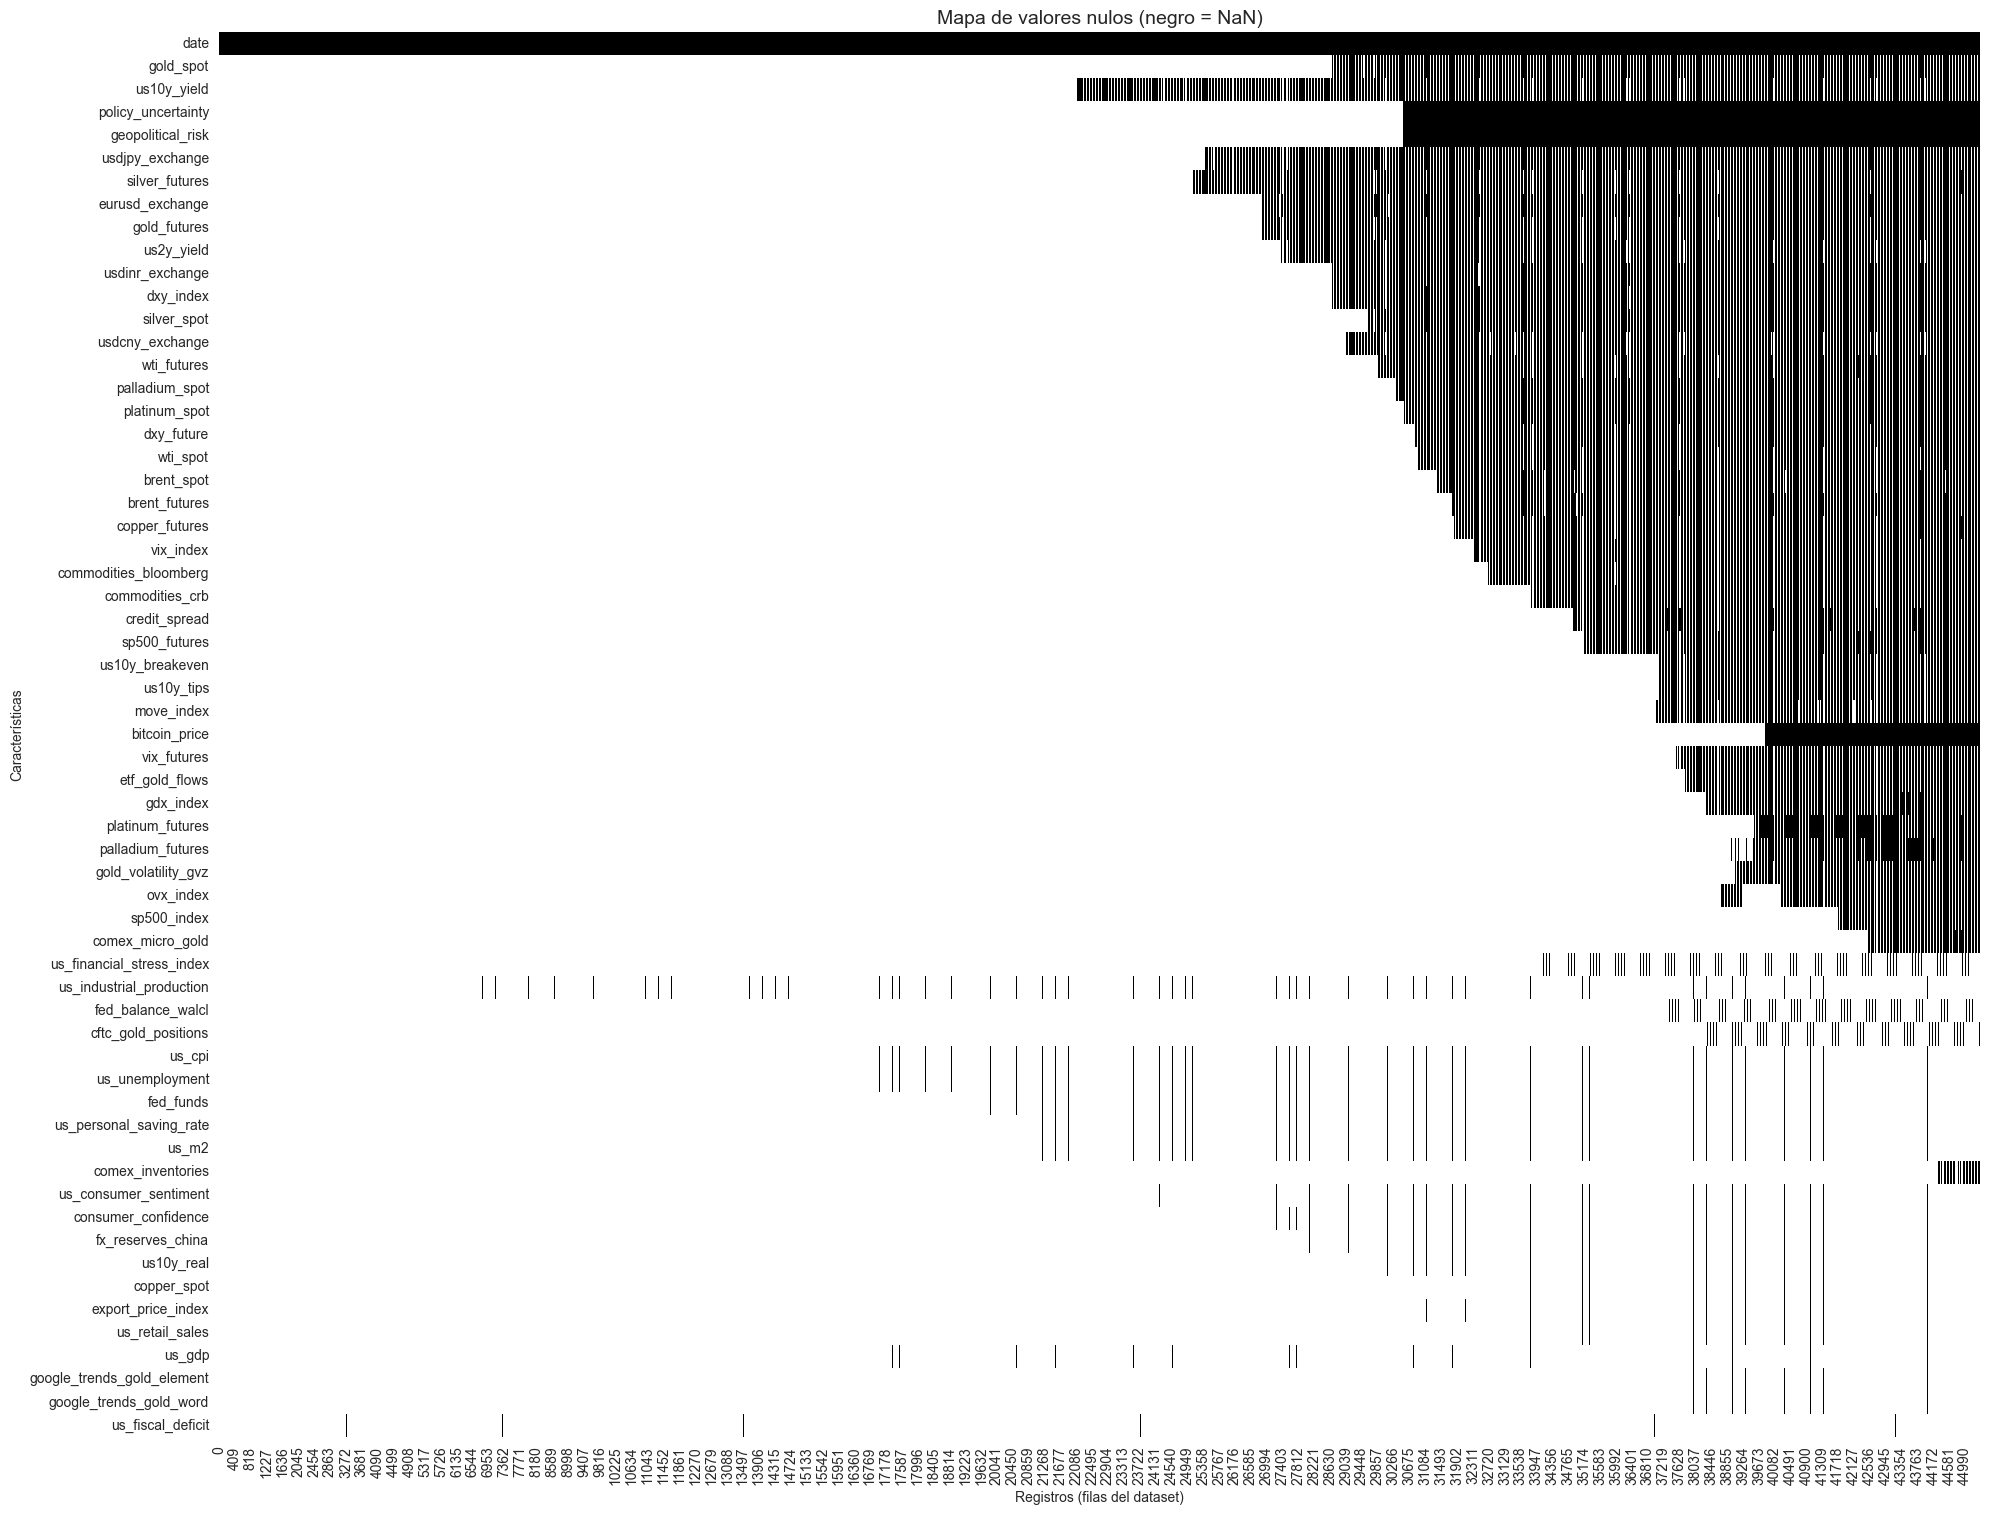

In [6]:
# -------------------------
# 2.1 Visualización directa de los valores nulos (mapa binario ancho)
# -------------------------
print("Visualizando patrón de valores nulos...")
null_mask = df.isnull().astype(int)
plt.figure(figsize=(20, max(6, len(df.columns) * 0.25)))
sns.heatmap(
    null_mask.T,
    cmap=["black", "white"],
    cbar=False
)
plt.title("Mapa de valores nulos (negro = NaN)", fontsize=14)
plt.xlabel("Registros (filas del dataset)")
plt.ylabel("Características")
plt.tight_layout()
plt.show()


## Interpretación del mapa de valores faltantes

El mapa binario confirma de manera visual lo que ya sugerían las estadísticas previas:

### 1. Gran parte del tramo inicial está completamente vacío
La sección correspondiente a los primeros años del dataset aparece **casi completamente negra**,
indicando que **prácticamente ninguna variable contiene información útil** en ese periodo.

Esto es totalmente coherente con la naturaleza del dataset:

- Muchas series financieras no existían en la primera mitad del siglo XX.
- Variables macroeconómicas modernas comienzan décadas después.
- Indicadores de riesgo (EPU, GPR), ETFs, y posiciones en futuros son muy recientes.
- Incluso metales y commodities tienen huecos extensos antes de los años 60–80.

### 2. La disponibilidad de datos mejora gradualmente con el tiempo
A medida que avanzan los años, la imagen muestra:

- un aumento progresivo de “zonas blancas” (datos disponibles),
- aunque con ritmos diferentes según la variable,
- lo cual refleja la heterogeneidad temporal del dataset.

### 3. La densidad de información se vuelve razonable recién en periodos más recientes
Solo a partir de cierto punto —más adelante determinaremos exactamente cuál— se aprecia:

- mayor uniformidad entre variables,
- reducción significativa de NaNs,
- presencia simultánea de muchas series.

### 4. Implicación inmediata
Este patrón visual refuerza la necesidad de seleccionar **un punto de inicio racional** para el análisis, evitando periodos donde:

- el target está vacío o casi vacío,
- la mayoría de features no existen,
- y cualquier cálculo estadístico resultaría inconsistente.

---

### Próximo paso
Usando esta información visual, aplicaremos un primer recorte basado en el:

**primer año en el que el target (`gold_spot`) tiene datos válidos.**

Esto nos dará un **primer START_YEAR provisional**, tras el cual continuaremos refinando el rango de estudio.


## 2.4) Selección inicial del año de inicio basado en la disponibilidad del target

Tras visualizar el patrón de valores faltantes, hemos comprobado que las primeras décadas del
dataset están prácticamente vacías para la mayoría de variables.
Antes de definir un rango temporal adecuado, debemos asegurarnos de que la **variable objetivo**
(`gold_spot`) tenga valores válidos.

El modelo no puede entrenarse ni evaluarse en periodos donde el target no exista, por lo que el
primer criterio mínimo y necesario es identificar:

> **¿En qué año aparece el primer valor válido del target?**

Una vez obtenido ese año, realizamos un recorte inicial del dataset, filtrando todas las filas
anteriores.
Este primer START_YEAR será un punto de partida provisional, que refinaremos más adelante cuando
analicemos la cobertura del resto de variables.


In [7]:
# -------------------------
# 2. Filtrar dataset desde el primer año con target disponible
# -------------------------
first_valid_year = df.loc[df[TARGET].notna(), DATE_COL].dt.year.min()
print(f"Primer año con valor válido de {TARGET}: {first_valid_year}")
START_YEAR = first_valid_year + 1 # más uno para completar lo que queda de año
df = df[df[DATE_COL].dt.year >= START_YEAR].reset_index(drop=True)
print(f"Dataset filtrado desde {START_YEAR}: {len(df)} filas")


Primer año con valor válido de gold_spot: 1979
Dataset filtrado desde 1980: 16694 filas


## Interpretación del recorte basado en el primer valor válido del target

El resultado muestra que el **primer registro disponible de `gold_spot` aparece en el año 1979**.
Dado que los meses iniciales de ese año pueden contener valores aislados o incompletos, se decide
comenzar el análisis a partir de **1980**, garantizando así un año completo en el que el target
está bien definido.

### Efecto del recorte
Al filtrar el dataset desde 1980:

- se eliminan automáticamente décadas enteras sin información útil,
- se descartan miles de filas completamente vacías,
- se mantiene únicamente el tramo temporal en el que la variable objetivo está presente,
- y se reduce el volumen de datos irrelevantes para el análisis.

### Por qué este recorte es razonable
Este paso no define aún el rango final de estudio, pero constituye un **primer filtrado necesario**:

- No tiene sentido analizar correlaciones o aplicar PCA en periodos donde el target no existe.
- El recorte evita distorsiones causadas por décadas con 100% de NaNs.
- Permite concentrar el EDA en un tramo temporal donde al menos el objetivo es observable.

Más adelante, refinaremos aún más el START_YEAR seleccionando un **punto de inicio más homogéneo**
para las demás features, especialmente aquellas que comienzan en fechas más recientes.


## 2.4.1) Visualización del patrón de missingness tras el recorte inicial

Después de recortar el dataset para comenzar en 1980 (primer año en el que `gold_spot` está
disponible), es necesario volver a visualizar la distribución de valores faltantes.

El objetivo de este paso es comprobar:

- si el recorte ha reducido significativamente la cantidad de NaNs,
- si las series comienzan en fechas similares,
- o si todavía hay muchas variables que siguen comenzando demasiado tarde,
- y evaluar si es necesario aplicar un recorte temporal más estricto para mejorar la cobertura.

Para ello generamos nuevamente un ** mapa binario de missingness**, pero ahora aplicado al dataset
recortado.


Visualizando patrón de valores nulos tras el recorte inicial...


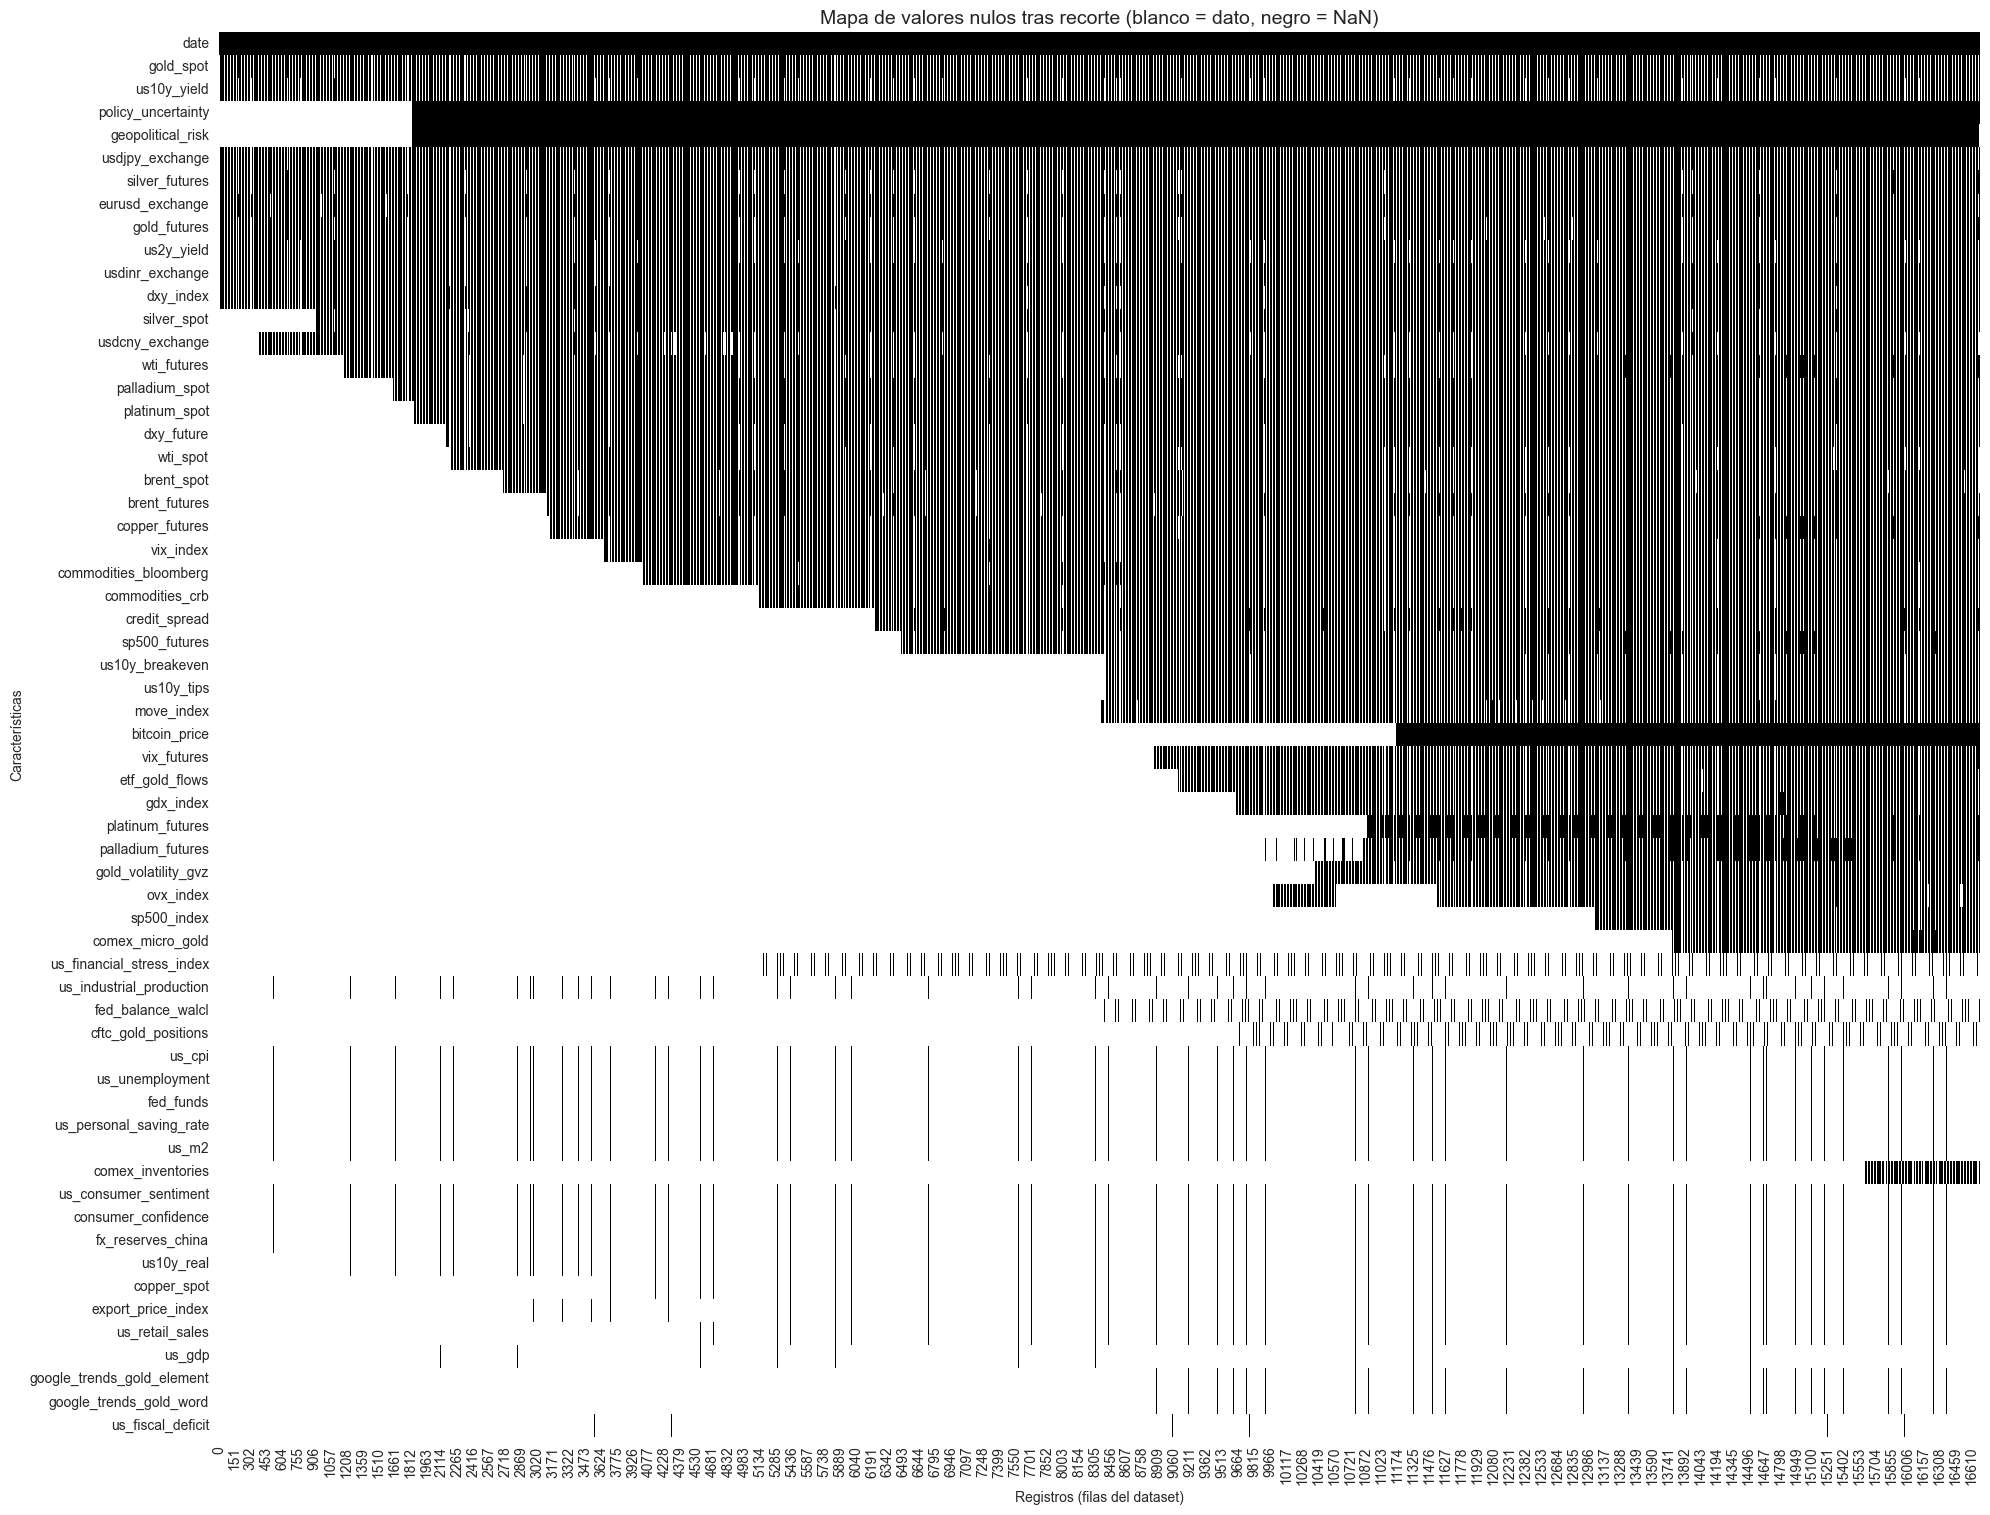

In [8]:
# -------------------------
# Visualización de missingness tras recorte inicial
# -------------------------
print("Visualizando patrón de valores nulos tras el recorte inicial...")

null_mask = df.isnull().astype(int)

plt.figure(figsize=(20, max(6, len(df.columns) * 0.25)))
sns.heatmap(
    null_mask.T,
    cmap=["black", "white"],
    cbar=False
)
plt.title("Mapa de valores nulos tras recorte (blanco = dato, negro = NaN)", fontsize=14)
plt.xlabel("Registros (filas del dataset)")
plt.ylabel("Características")
plt.tight_layout()
plt.show()


## Interpretación del mapa de valores faltantes tras el recorte inicial (1980)

La visualización del patrón de missingness después de aplicar el primer recorte temporal confirma que
la eliminación de los años anteriores a 1980 mejora parcialmente la densidad del dataset, pero aún
se observan varios efectos importantes:

---

### 1. Las series financieras diarias comienzan pronto y muestran buena disponibilidad
Las variables más directamente relacionadas con mercados líquidos —como `gold_futures`, `us10y_yield`,
`sp500_index`, `dxy_index`, `silver_spot`, `wti_spot`, `vix_index`, etc.— aparecen mayoritariamente
en blanco a partir de la década de 1980, lo que indica que disponemos de:
- registros continuos,
- frecuencia diaria estable,
- y ausencia de huecos prolongados.

Estas variables son candidatas sólidas para el análisis multivariante temprano.

---

### 2. Las series con frecuencia baja (mensual, trimestral, anual) aparecen en la parte inferior del gráfico
Tal como muestra el heatmap:
- variables mensuales (CPI, M2, Retail Sales…)
- variables trimestrales (GDP),
- y variables anuales (déficit fiscal, tasas reales de largo plazo),

aparecen representadas por patrones de puntos aislados, característicos de su frecuencia original.

Lo relevante es que **también comienzan alrededor de los años 80–90**, por lo que se alinean razonablemente bien con el target en ese tramo.

---

### 3. Persisten variables que comienzan claramente más tarde
Una parte identificable del heatmap muestra columnas que permanecen negras durante un tramo prolongado,
lo cual indica que ciertas series:
- no existían antes de los años 2000–2010,
- o comenzaron a registrarse mucho después (p. ej., Bitcoin, OVX, indicadores modernos de riesgo).

Esto confirma que aún existe una **segunda franja de ausencia estructural** que deberemos gestionar.

---

### 4. La cobertura general mejora, pero no es homogénea
Aunque la densidad global de datos tras el recorte es mucho más alta, se observa:

- heterogeneidad clara entre grupos de variables,
- diferencias notables en la fecha de inicio de cada serie,
- y solapamientos incompletos en los años 80 y 90.

Esto sugiere que el dataset todavía no está en un rango ideal para aplicar técnicas multivariantes sin un tratamiento adicional.

---

### 5. Implicación práctica: el recorte a 1980 es razonable, pero no suficiente
La visualización muestra que empezar en 1980 garantiza la disponibilidad del target y de muchas
series diarias relevantes.

Sin embargo:

- todavía hay variables que no comienzan hasta mucho más tarde,
- lo que introduce bloques de NaNs que no son imputables de manera realista,
- y afectaría análisis como correlaciones, PCA o VIF.

Por tanto, para obtener un dataset más “compacto y uniforme”, necesitaremos aplicar un **segundo recorte más estratégico** basado en una feature que actúe como punto de convergencia temporal de la mayoría de variables.

---

### Próximo paso
Dado el patrón observado, el siguiente paso lógico será:

> Identificar la primera variable que presenta registros consistentes y densos y establecer su año inicial como **nuevo START_YEAR estratégico**.

Como veremos, la variable `geopolitical_risk` resulta ser un excelente candidato para este propósito. (Preprocessing)


## 3) Imputación temporal exploratoria y normalización del dataset

Para continuar con el análisis exploratorio (EDA) necesitamos un dataset **completo**, sin valores
faltantes, ya que técnicas como:

- correlaciones multivariantes,
- PCA (Análisis de Componentes Principales),
- VIF (Variance Inflation Factor),
- métricas basadas en modelos,
- y análisis de estabilidad temporal,

requieren que no existan `NaN` en ninguna columna.

El principal desafío es que las series originales provienen de **fuentes heterogéneas** con
frecuencias distintas (diaria, mensual, trimestral, anual) y, además, **comienzan en años diferentes**.
Para mitigar esta disparidad y construir una versión usable del dataset, aplicamos una imputación
temporal simple basada en dos pasos:

1. **Forward Fill (`ffill`)**
   Propaga hacia adelante el último valor conocido.
   Es adecuado para datos macroeconómicos y financieros donde muchas variables se mantienen constantes
   entre fechas de publicación (CPI, PIB, M2, unemployment…).

2. **Backward Fill (`bfill`)**
   Se utiliza solo para rellenar los primeros registros, antes del primer valor disponible.
   Afecta principalmente a variables de baja frecuencia y su impacto en la dinámica temporal es muy
   limitado.

El uso conjunto de `ffill` + `bfill` es **válido y seguro en la fase exploratoria** porque:

- las imputaciones por `bfill` ocurren **solo al inicio del periodo** (tras el recorte en 1985),
- los indicadores afectados son de **frecuencia baja** y varían lentamente,
- esta imputación **no se usará para modelar**, únicamente para análisis descriptivos,
- permite evitar la eliminación masiva de filas y conservar la estructura multivariada del dataset.

Finalmente, como las técnicas multivariantes son sensibles a las escalas, aplicamos un
**StandardScaler**, obteniendo un conjunto de variables con media 0 y varianza 1.

La versión resultante es el `dataset_imputado_escalado_simple.csv`, usado exclusivamente para EDA.


In [9]:
# -------------------------
# 3) Imputación temporal y normalización exploratoria
# -------------------------

print("Imputando valores faltantes...")

y = df[TARGET].copy()
X = df.drop(columns=[DATE_COL, TARGET]).copy()

# Imputación temporal exploratoria
X = X.ffill().bfill()
y = y.ffill().bfill()

# Normalización
scaler = StandardScaler()
X_scaled = pd.DataFrame(
    scaler.fit_transform(X),
    columns=X.columns,
    index=X.index
)

# Construcción del dataset exploratorio final
df_exploratory = pd.concat([df[DATE_COL], y.rename(TARGET), X_scaled], axis=1)

# Guardado
output_path = "dataset_imputado_escalado_simple.csv"
df_exploratory.to_csv(output_path, index=False)

print(f"Dataset exploratorio guardado en: {output_path}")


Imputando valores faltantes...
Dataset exploratorio guardado en: dataset_imputado_escalado_simple.csv


## Interpretación de la imputación temporal y creación del dataset exploratorio

La aplicación de `ffill` seguida de `bfill` permite obtener un dataset completamente observado sin
eliminar filas y sin recurrir a modelos más complejos que podrían sesgar el análisis. Los efectos
principales observados son los siguientes:

---

### 1. El forward-fill funciona de manera natural en series financieras y macroeconómicas
Muchos indicadores económicos se publican una vez al mes o una vez al trimestre, permaneciendo
constantes hasta la siguiente actualización. Por ello:

- `ffill` no introduce información futura,
- mantiene el valor más reciente conocido,
- y respeta el comportamiento típico de las series de baja frecuencia.

Es una práctica estándar en EDA de finanzas y macro.

---

### 2. El backward-fill afecta solo a los primeros registros
El `bfill` solo entra en juego cuando una variable comienza después de 1985.
Se limita a rellenar los primeros valores vacíos utilizando el primer dato disponible de esa serie.

Esto es justificable porque:

1. La imputación ocurre **solo en los primeros días** del periodo analizado.
2. Afecta a variables de **baja frecuencia**, donde los saltos entre observaciones son grandes.
3. No se utilizará para entrenar modelos, solo para:
   - calcula PCA,
   - correlaciones,
   - VIF,
   - métricas estadísticas que requieren un dataset completo.

Por tanto, **no existe riesgo de data leakage en el workflow de modelado**, ya que este dataset es
exclusivamente exploratorio.

---

### 3. Estandarización mediante StandardScaler
El escalado elimina las diferencias de magnitud entre variables, permitiendo que:

- PCA no se sesgue hacia las variables de mayor varianza,
- correlaciones no queden dominadas por efectos de escala,
- y VIF identifique multicolinealidad de forma correcta.

---

### 4. Archivo final exploratorio
El fichero generado:
dataset_imputado_escalado_simple.csv
- fecha (`date`)
- target (`gold_spot`)
- todas las features escaladas y sin valores faltantes

y será usado exclusivamente para los análisis exploratorios posteriores.

---

### Advertencia importante
Este dataset **NO puede emplearse en entrenamiento o validación de modelos**, ya que contiene
imputaciones no causales (especialmente por `bfill`).
Para el modelado se utilizará un pipeline que:

- impute solo con datos pasados,
- evite cualquier fuga temporal,
- y respete el orden crono-causal completo.

---

### Conclusión
La imputación ffill + bfill, aplicada después del recorte temporal a 1985, permite construir una
versión completa y normalizada del dataset multivariado, adecuada para el EDA y para técnicas
analíticas que requieren matrices sin valores faltantes.

A continuación podremos aplicar:

- correlaciones,
- PCA,
- VIF,
- análisis de importancia,
- y diagnósticos temporales

con total estabilidad numérica.



## 4) PCA Exploratorio: reducción de dimensionalidad y análisis de varianza

Tras imputar y escalar el dataset exploratorio, el siguiente paso del EDA es aplicar un
**Análisis de Componentes Principales (PCA)**.

El PCA permite:

- identificar direcciones de máxima varianza en los datos,
- medir cuánta información se puede explicar con pocas combinaciones lineales,
- detectar redundancia entre variables,
- evaluar si existen grupos naturales de features que aportan información similar,
- y generar un primer indicador de relevancia global basado en la contribución de cada feature a los
  componentes principales.

Este PCA no se utiliza para modelado directo, sino como herramienta de diagnóstico:

- ayuda a entender si el dataset tiene muchas dimensiones útiles o pocas,
- permite identificar features que dominan la varianza global,
- y anticipa problemas de multicolinealidad.

Además, generaremos dos salidas importantes:

1. **Scree plot** (varianza explicada por componente)
2. **Ranking PCA_score** por feature, calculado a partir de las cargas y de la varianza explicada.

Este ranking será utilizado más adelante en la etapa de selección de características.


Ejecutando PCA exploratorio...
Componentes seleccionados con 95% de varianza explicada: 14
PCA completado.
Archivos guardados: 
pca_top25_features.csv 
pca_loadings.csv


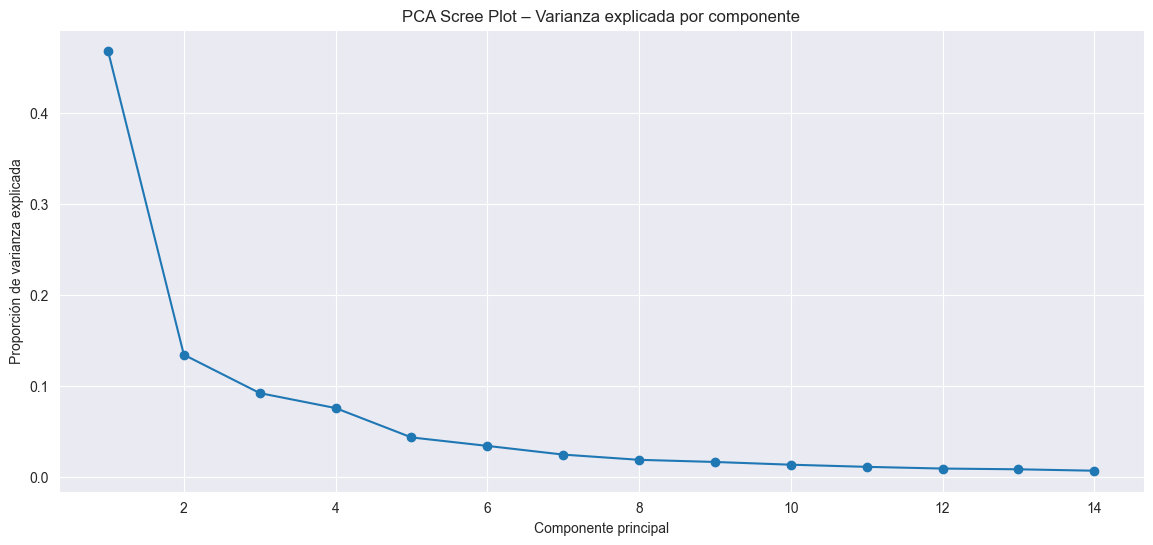

In [10]:
# -------------------------
# 4) PCA Exploratorio
# -------------------------

print("Ejecutando PCA exploratorio...")

# Solo utilizamos las features escaladas (ya sin NaNs)
X_only = df_exploratory.drop(columns=[DATE_COL, TARGET])

pca = PCA(n_components=PCA_VARIANCE_THRESHOLD)
pca.fit(X_only)

n_components_selected = pca.n_components_
print(f"Componentes seleccionados con {PCA_VARIANCE_THRESHOLD*100:.0f}% de varianza explicada:",
      n_components_selected)

# Cargas (loadings) de los componentes
loadings = pd.DataFrame(
    pca.components_[:n_components_selected].T,
    index=X_only.columns,
    columns=[f"PC{i+1}" for i in range(n_components_selected)]
)

# Peso de cada componente (varianza explicada)
weights = pca.explained_variance_ratio_[:n_components_selected]

# Importancia global por feature
pca_importance = (loadings.abs() * weights).sum(axis=1).rename("PCA_score")

# Guardar resultados
pca_importance.to_csv(os.path.join(OUTPUT_DIR, "pca_top25_features.csv"))
loadings.to_csv(os.path.join(OUTPUT_DIR, "pca_loadings.csv"))

print("PCA completado.")
print("Archivos guardados:",
      "\npca_top25_features.csv",
      "\npca_loadings.csv")

# -------------------------
# Scree Plot
# -------------------------

plt.figure(figsize=(14,6))
plt.plot(range(1, n_components_selected+1),
         pca.explained_variance_ratio_[:n_components_selected],
         marker='o')
plt.title("PCA Scree Plot – Varianza explicada por componente")
plt.xlabel("Componente principal")
plt.ylabel("Proporción de varianza explicada")
plt.grid(True)
plt.show()


## **Interpretación del PCA Exploratorio**

El PCA aplicado al dataset imputado y escalado (solo para fines exploratorios) permite analizar la estructura global de las 59 características después del recorte temporal basado en el primer valor válido del target. Este recorte modifica la varianza total y, en consecuencia, la contribución de cada componente principal.

### **1. Reducción de dimensionalidad y número de componentes necesarios**

El Scree Plot actualizado muestra que:

- El **primer componente principal (PC1)** explica alrededor de **el 45–47% de la varianza**, lo cual sigue siendo un valor muy alto.
- Los siguientes componentes tienen contribuciones decrecientes pero no tan abruptas como en el PCA previo.
- En esta versión del dataset se requieren **14 componentes** para alcanzar aproximadamente el **95% de la varianza explicada**.

Esto implica que, aunque el dataset tenga 59 variables, la **dimensionalidad efectiva sigue siendo mucho menor**, y gran parte del comportamiento multivariado puede describirse mediante un conjunto relativamente reducido de factores.

### **2. Estructura correlacional fuerte y patrones conjuntos**

Como en análisis anteriores, la alta contribución de los primeros componentes confirma que:

- Muchas variables tienen dinámicas similares,
- Existen factores macroeconómicos y financieros que afectan simultáneamente a varios indicadores,
- Subyace una estructura fuertemente correlacionada entre metales, divisas, índices y variables macro.

Esto es coherente con lo observado en las correlaciones y con la naturaleza de los datos financieros.

### **3. Importancia relativa de las características (PCA Score)**

A partir de las cargas (loadings) y del peso relativo de cada componente, se genera el **PCA_score**, que identifica qué variables son las que más contribuyen a la variabilidad global del sistema.

Este score:

- No es un criterio de selección definitivo,
- No implica causalidad,
- Pero sí actúa como una primera medida para detectar variables informativas y redundancias.

Las variables con mayor PCA_score suelen ser:

- metales preciosos (oro, plata, platino),
- futuros asociados a commodities relevantes,
- algunos índices de volatilidad o riesgo financiero,
- indicadores macroeconómicos clave.

### **4. Diferencias respecto a la versión previa (antes del recorte temporal)**

El hecho de que ahora se necesiten **14** componentes para alcanzar el 95% de la varianza (antes eran 13) indica que:

- El recorte temporal eliminó periodos antiguos con patrones más homogéneos,
- Las variables modernas introducen más variabilidad relativa,
- La estructura temporal ahora es más rica y menos dominada por los primeros PCs.

Esto es coherente con el hecho de que muchas variables recientes poseen dinámicas más complejas o específicas, lo cual incrementa la cantidad de componentes necesarios para describir adecuadamente la variabilidad del conjunto.

### **Conclusión**

El PCA actualizado confirma que:

- El dataset presenta una **alta colinealidad** entre sus variables,
- La mayor parte de la variabilidad puede capturarse con un número reducido de componentes,
- El recorte temporal afecta ligeramente la estructura del PCA, pero no la esencia del diagnóstico,
- Este análisis es una guía útil dentro del EDA, pero no constituye todavía una selección formal de características.

El PCA exploratorio permite comprender mejor cómo se agrupan y relacionan las características, y confirma la necesidad de aplicar técnicas avanzadas de reducción de redundancia en fases posteriores del proyecto.


## 5) Análisis de correlaciones (Pearson y Spearman)

Después del PCA exploratorio, el siguiente paso del EDA consiste en estudiar las **relaciones
bivariadas** entre las variables. Este análisis es fundamental para comprender:

- qué features mantienen correlación lineal con `gold_spot` (Pearson),
- qué relaciones monotónicas existen aunque no sean lineales (Spearman),
- qué grupos de variables están fuertemente correlacionados entre sí (redundancia),
- y qué señales destacan preliminarmente como candidatas relevantes o redundantes.

Se aplican dos métricas complementarias:

### Pearson
Captura correlación lineal directa. Muy útil para variables macroeconómicas y financieras.

### Spearman
Captura relaciones monotónicas. Es más robusto a outliers y no requiere linealidad.

A partir de estas correlaciones generaremos:

- un fichero completo con la matriz de Pearson,
- otro con la matriz de Spearman,
- un ranking de correlaciones con el target, ambos métodos,
- y visualizaciones del top 15 para interpretar las relaciones significativas.

Esto nos permitirá comparar este análisis con el PCA y comenzar a identificar:

- redundancia (features casi duplicadas),
- clusters de variables altamente relacionadas,
- y primeras señales candidatas para selección de características.


Calculando correlaciones entre features (sin el target)...
Matrices guardadas.
Calculando correlación de cada feature con el target...


,feature,pearson_with_target,spearman_with_target
6,gold_futures,0.999952,0.999711
53,export_price_index,0.995915,0.943257
30,etf_gold_flows,0.995834,0.885738
10,silver_spot,0.921109,0.906926
46,us_m2,0.915343,0.725879
56,google_trends_gold_element,0.902266,0.799378
4,silver_futures,0.896157,0.913495
19,copper_futures,0.892630,0.868107
55,us_gdp,0.891936,0.726084
40,fed_balance_walcl,0.889629,0.877342


feature_corr_with_target.csv guardado correctamente


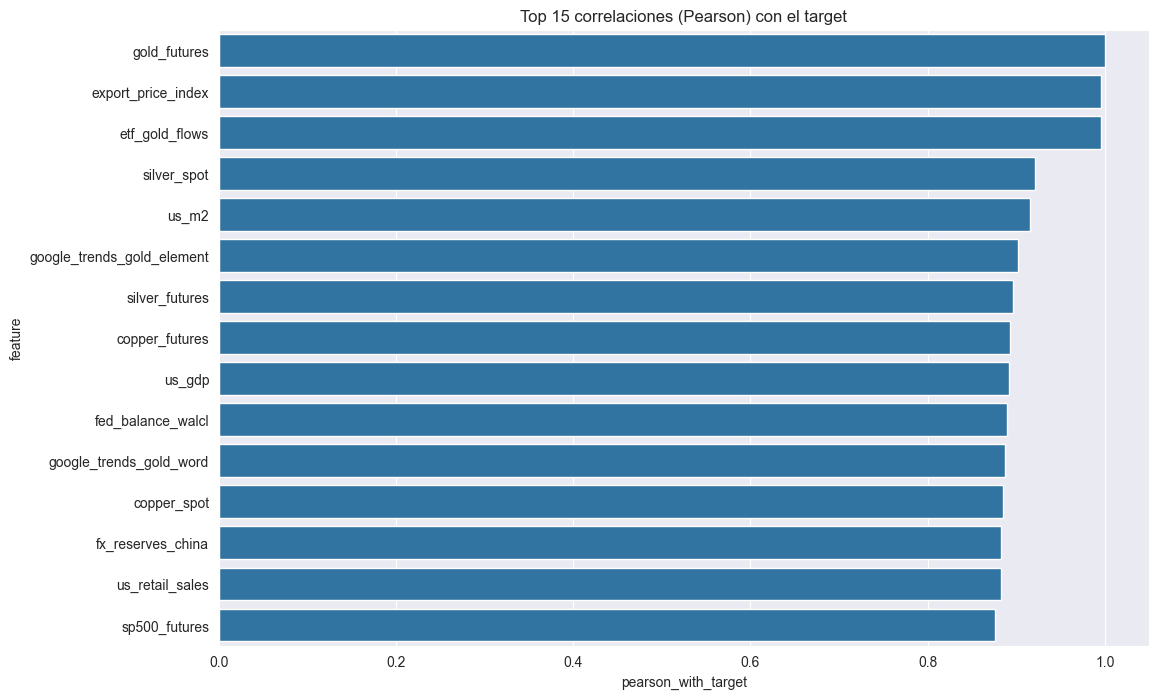

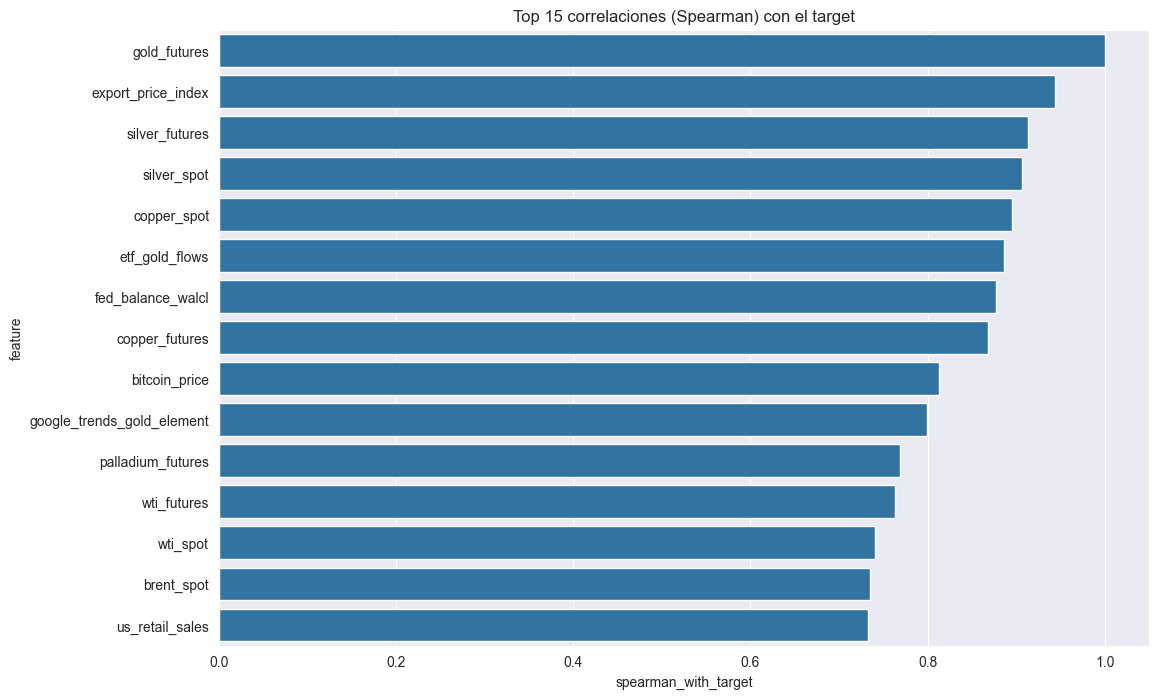

In [11]:
# -------------------------
# 5) Correlaciones
# -------------------------

print("Calculando correlaciones entre features (sin el target)...")

X_scaled = df_exploratory.drop(columns=[DATE_COL, TARGET])
y = df_exploratory[TARGET]

# Correlación entre features
corr_pearson = X_scaled.corr(method="pearson")
corr_spearman = X_scaled.corr(method="spearman")

corr_pearson.to_csv(os.path.join(OUTPUT_DIR, "feature_corr_matrix_pearson.csv"))
corr_spearman.to_csv(os.path.join(OUTPUT_DIR, "feature_corr_matrix_spearman.csv"))

print("Matrices guardadas.")

# -------------------------
# 5.1 Correlación con el target
# -------------------------

print("Calculando correlación de cada feature con el target...")

X_corr = X_scaled.copy()
X_corr[TARGET] = y

corr_pearson_full = X_corr.corr(method="pearson")
corr_spearman_full = X_corr.corr(method="spearman")

corr_with_target = pd.DataFrame({
    "feature": X_scaled.columns,
    "pearson_with_target": corr_pearson_full[TARGET][X_scaled.columns].values,
    "spearman_with_target": corr_spearman_full[TARGET][X_scaled.columns].values
})

corr_with_target = corr_with_target.sort_values("pearson_with_target", ascending=False)
corr_with_target.to_csv(os.path.join(OUTPUT_DIR, "feature_corr_with_target.csv"), index=False)

display(corr_with_target.head(20))

print("feature_corr_with_target.csv guardado correctamente")

# -------------------------
# 5.2 Visualización (Top 15)
# -------------------------

top15_pearson = corr_with_target.head(15)
top15_spearman = corr_with_target.sort_values("spearman_with_target", ascending=False).head(15)

plt.figure(figsize=(12,8))
sns.barplot(data=top15_pearson, y="feature", x="pearson_with_target")
plt.title("Top 15 correlaciones (Pearson) con el target")
plt.xlabel("pearson_with_target")
plt.ylabel("feature")
plt.show()

plt.figure(figsize=(12,8))
sns.barplot(data=top15_spearman, y="feature", x="spearman_with_target")
plt.title("Top 15 correlaciones (Spearman) con el target")
plt.xlabel("spearman_with_target")
plt.ylabel("feature")
plt.show()


## Análisis de correlaciones con el target (Pearson y Spearman)

Una vez construido el dataset exploratorio (imputación simple + escalado), se analizó la relación
entre cada una de las 59 características y el precio del oro (`gold_spot`) mediante dos métricas
de correlación ampliamente utilizadas en análisis financiero:

- **Correlación de Pearson** → mide dependencia lineal directa.
- **Correlación de Spearman** → mide relaciones monotónicas, más robusta ante outliers.

El objetivo aquí no es seleccionar todavía las variables finales, sino:

- identificar patrones económicos coherentes,
- detectar redundancia entre grupos de variables,
- y comparar los resultados con el PCA exploratorio para validar consistencia general.

---

## Resultados principales — Pearson (Top 15)

El ranking de correlaciones de Pearson muestra valores excepcionalmente altos, situados en torno a
**0.85–0.99**, lo que indica relaciones lineales muy fuertes entre el precio del oro y numerosas
variables del entorno financiero.

Entre las más correlacionadas se encuentran:

- `gold_futures` (≈ 0.99)
- `export_price_index`
- `etf_gold_flows`
- `silver_futures`, `silver_spot`
- `copper_futures` / `copper_spot`
- `us_m2`, `us_gdp`, `us_cpi`
- `us_retail_sales`
- `fed_balance_walcl`
- `fx_reserves_china`

Este conjunto de correlaciones es económicamente coherente:

- Los futuros del oro tienden a moverse casi uno a uno con el spot.
- Los metales preciosos comparten drivers comunes (industria, refugio, demanda global).
- Las variables macroeconómicas reflejan condiciones de liquidez, inflación y actividad económica.
- Flujos de ETFs y reservas internacionales capturan posiciones de inversión y factores sistémicos.

---

## Resultados principales — Spearman (Top 15)

El ranking de Spearman es prácticamente idéntico al de Pearson, indicando que las relaciones:

- no solo son lineales,
- sino también monótonas y estables a nivel histórico.

Una diferencia relevante:

- `bitcoin_price` aparece dentro del Top 15 de Spearman, pero no en Pearson.

Interpretación:

- Su relación con el oro no es estrictamente lineal,
- pero sí mantiene una **relación monotónica** en varios períodos (activos alternativos durante estrés financiero).

---

## Redundancia evidente entre features

Las matrices completas de Pearson y Spearman muestran grupos de variables casi duplicadas:

- `gold_futures` ↔ `gold_spot`
- `silver_futures` ↔ `silver_spot`
- `copper_futures` ↔ `copper_spot`
- `google_trends_gold_element` ↔ `google_trends_gold_word`
- `us_gdp`, `us_cpi`, `us_m2`, `retail_sales` (macro altamente sincronizadas)

Este comportamiento confirma lo observado en el PCA:

> El dataset presenta **redundancia estructural severa** y una fuerte multicolinealidad.

---

## Coherencia con el PCA exploratorio

El PCA mostró que:

- los primeros componentes concentran la mayor parte de la varianza,
- el primer componente está dominado por metales preciosos y flujos financieros,
- componentes posteriores recogen variabilidad macroeconómica.

El análisis de correlaciones confirma:

- los metales preciosos explican gran parte del movimiento del oro,
- las variables macroeconómicas aportan información complementaria,
- muchas variables comparten patrones casi idénticos.

---

## Conclusión del análisis de correlaciones

- Las correlaciones son **económicamente coherentes** y respaldan la calidad de los datos.
- Existe una **multicolinealidad severa** que deberá tratarse rigurosamente.
- Pearson y Spearman coinciden prácticamente en todo, señal de relaciones lineales y monótonas muy fuertes.
- Los grupos de features redundantes están claramente identificados.
- Este diagnóstico refuerza la necesidad de aplicar una **selección avanzada de características** en la siguiente etapa:
  - PCA,
  - clustering por correlación,
  - reducción iterativa por VIF,
  - y métodos basados en modelos.

Este análisis servirá como referencia para la fase posterior de reducción de dimensionalidad y limpieza del conjunto de features.


## 6) Análisis exploratorio de multicolinealidad mediante VIF

Además de las correlaciones bivariadas, es necesario evaluar la presencia de
multicolinealidad entre las variables. Este fenómeno aparece cuando una o varias
features pueden expresarse como combinación lineal de otras, lo que dificulta:

- la interpretación individual de cada variable,
- la estabilidad de los modelos lineales,
- la robustez del entrenamiento,
- y la generalización del modelo.

Para medir este efecto utilizamos el **Variance Inflation Factor (VIF)**, que estima
cuánto se infla la varianza de los coeficientes debido a la redundancia entre features.

Interpretación estándar del VIF:

- **VIF = 1 → Sin colinealidad**
- **VIF < 5 → Aceptable**
- **VIF 5–10 → Colinealidad moderada**
- **VIF > 10 → Colinealidad severa (variable problemática)**
- **VIF > 30–50 → Colapsa cualquier modelo lineal**

Dado que nuestro dataset contiene múltiples activos financieros estrechamente relacionados (oro, plata, cobre, ETF flows), así como indicadores macroeconómicos interdependientes (CPI, M2, GDP…), es esperable encontrar VIF altos.

Este análisis exploratorio permitirá identificar los grupos de variables redundantes y servirá como base para la fase posterior de selección mediante:
- filtrado por VIF,
- clustering de correlaciones,
- PCA,
- o selección basada en modelos.


In [12]:
# -------------------------
# 6) Cálculo exploratorio del VIF
# -------------------------

print("Calculando VIF (Variance Inflation Factor)...")

# Matriz numérica (sin fecha y sin target)
X_vif = df_exploratory.drop(columns=[DATE_COL, TARGET])

vif_data = []
for i, col in enumerate(X_vif.columns):
    try:
        vif_val = variance_inflation_factor(X_vif.values, i)
    except Exception:
        vif_val = np.nan
    vif_data.append({"feature": col, "VIF": vif_val})

vif_df = pd.DataFrame(vif_data).sort_values("VIF", ascending=False)

# Guardar resultado
vif_df.to_csv(os.path.join(OUTPUT_DIR, "vif_exploratorio.csv"), index=False)

display(vif_df.head(20))
print("Archivo guardado: vif_exploratorio.csv")


Calculando VIF (Variance Inflation Factor)...


,feature,VIF
55,us_gdp,3641.848363
46,us_m2,2857.091858
42,us_cpi,2791.250188
16,wti_spot,1519.567040
12,wti_futures,1475.137837
18,brent_futures,1471.655242
30,etf_gold_flows,1427.647295
6,gold_futures,1109.397263
17,brent_spot,1046.416716
24,sp500_futures,630.530251


Archivo guardado: vif_exploratorio.csv


### Resultados principales del VIF exploratorio

El fichero `vif_exploratorio.csv` muestra valores extremadamente altos para una gran parte de las
features, incluyendo:

- variables con VIF **muy por encima de 100**,
- varias con valores **entre 300 y 1500**,
- e incluso algunas cercanas a **2000**.

Estos valores indican que muchas características son **prácticamente combinaciones lineales** de otras.
Este fenómeno es habitual en datos macroeconómicos y financieros, donde muchas series:

- siguen tendencias comunes (inflación, ciclo económico, liquidez),
- responden a los mismos shocks globales,
- o representan distintas facetas de una misma variable subyacente.

La presencia de multicolinealidad tan severa confirma lo observado en:

- el PCA (varianza muy concentrada en pocos componentes),
- las matrices de correlación (relaciones superiores al 0.90 en múltiples pares),
- y los gráficos de correlación con el target (redundancia sistemática).

---

### Implicaciones para el modelado

Multicolinealidad tan alta provoca:

- **coeficientes inestables** en modelos lineales,
- **sobreajuste** en modelos de regresión penalizada,
- **importancias distorsionadas** en modelos basados en árboles,
- deterioro en la interpretabilidad y en la capacidad de generalización.

Por tanto, este resultado anticipa la necesidad de aplicar un proceso de **reducción y depuración**
del conjunto de características antes del modelado final.

---

### Conclusión del VIF exploratorio

El diagnóstico mediante VIF confirma que el dataset presenta **redundancia masiva** y
multicolinealidad severa. Esta condición es incompatible con un pipeline predictivo confiable, y
por tanto será necesario aplicar mecanismos adicionales para reducir la dimensionalidad de forma
robusta.

---

### (Avance de la siguiente etapa)

En el siguiente punto se describirá un procedimiento más avanzado basado en:

- **agrupación por correlación**
- **reducción iterativa mediante VIF**

para obtener un conjunto final de características **estable, no redundante y más adecuado para
modelos predictivos**.

## 7) Distribución del target y detección de posibles outliers

Antes de completar el análisis exploratorio, es fundamental estudiar la distribución
estadística del precio del oro (`gold_spot`) y evaluar la presencia de valores atípicos.
Este tipo de inspección es especialmente importante en series financieras porque:

- los activos suelen presentar distribuciones no normales,
- pueden aparecer colas gruesas (fat tails),
- existen shocks macroeconómicos que generan saltos abruptos,
- la presencia de outliers afecta directamente a métricas sensibles como Pearson o PCA.

En esta sección evaluamos:

1. **Histograma + KDE**
   Para observar la forma general de la distribución.

2. **Boxplot**
   Para identificar rangos y outliers visibles.

3. **Estadísticos básicos**
   (asimetría, curtosis, percentiles)

Este análisis nos permitirá comprender mejor la naturaleza estadística del target
y valorar si será necesario aplicar transformaciones (log-return, differencing, scaling)
en etapas posteriores de modelado.


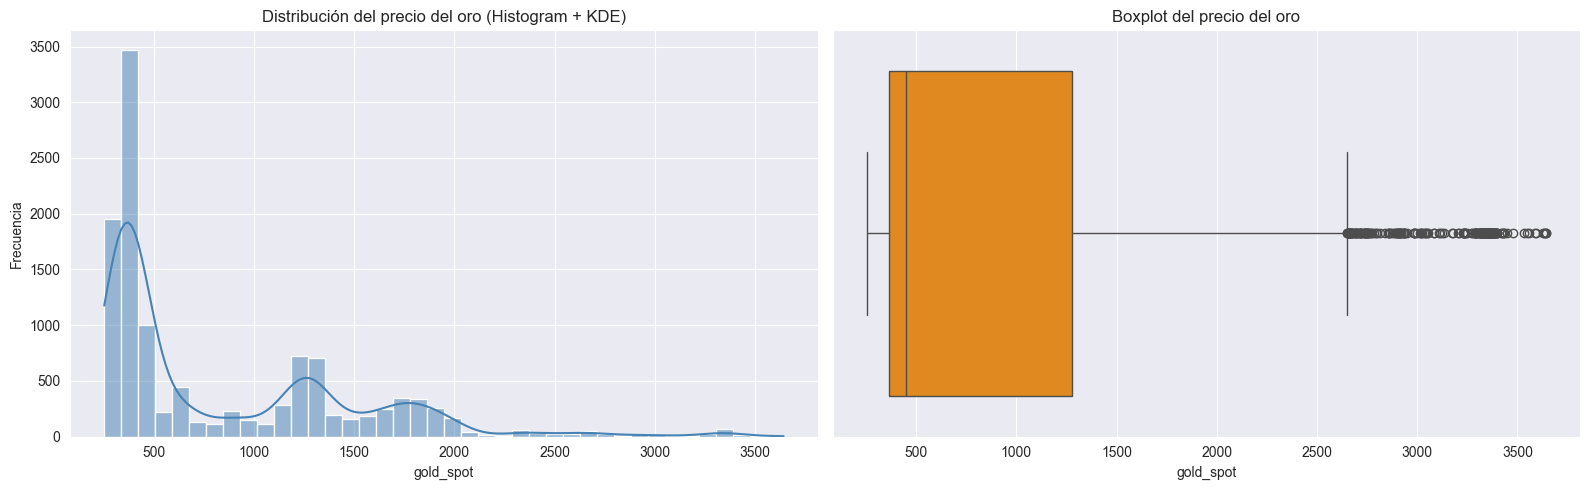

{'mean': np.float64(840.3225508395917),
 'median': np.float64(446.99),
 'std': np.float64(645.6857155327351),
 'min': np.float64(252.55),
 'max': np.float64(3643.13),
 'skewness': np.float64(1.3232927899018134),
 'kurtosis': np.float64(1.4785919686604334),
 'percentiles': {0.01: 263.3,
  0.05: 283.82500000000005,
  0.25: 363.63,
  0.5: 446.99,
  0.75: 1278.33,
  0.95: 1954.29,
  0.99: 3051.64}}

In [13]:
# -------------------------
# Distribución del target
# -------------------------
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

target = df[TARGET].dropna()

fig, ax = plt.subplots(1, 2, figsize=(16, 5))

# Histograma + KDE
sns.histplot(target, kde=True, ax=ax[0], bins=40, color="steelblue")
ax[0].set_title("Distribución del precio del oro (Histogram + KDE)")
ax[0].set_xlabel("gold_spot")
ax[0].set_ylabel("Frecuencia")

# Boxplot
sns.boxplot(x=target, ax=ax[1], color="darkorange")
ax[1].set_title("Boxplot del precio del oro")
ax[1].set_xlabel("gold_spot")

plt.tight_layout()
plt.show()

# Estadísticos básicos
stats_target = {
    "mean": target.mean(),
    "median": target.median(),
    "std": target.std(),
    "min": target.min(),
    "max": target.max(),
    "skewness": skew(target),
    "kurtosis": kurtosis(target),
    "percentiles": target.quantile([0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99]).to_dict(),
}

stats_target


## Interpretación de la distribución del precio del oro y detección de outliers

El análisis exploratorio de la variable objetivo (`gold_spot`) muestra una distribución fuertemente
asimétrica, multimodal y característica de un activo financiero con tendencia estructural creciente.
Las estadísticas descriptivas confirman visualmente lo observado en los gráficos de distribución y
boxplot:

- **Media:** 840.32
- **Mediana:** 446.99
- **Desviación estándar:** 645.69
- **Mínimo:** 252.55
- **Máximo:** 3643.13
- **Asimetría (skewness):** 1.32
- **Curtosis:** 1.48
- **Percentiles clave:**
  - 1% ⇒ 263.30
  - 5% ⇒ 283.83
  - 25% ⇒ 363.63
  - 50% ⇒ 446.99
  - 75% ⇒ 1278.33
  - 95% ⇒ 1954.29
  - 99% ⇒ 3051.64

Estas cifras permiten interpretar con mayor precisión la estructura de la distribución.

### 1. Distribución: multimodalidad y fuerte asimetría positiva
El histograma y la curva de densidad (KDE) muestran que:

- La serie presenta **multimodalidad**, reflejando distintos regímenes históricos del precio del oro
  (por ejemplo, niveles pre-2000, crisis financiera 2008–2011, y la escalada posterior a 2020).
- La **asimetría positiva elevada (skewness = 1.32)** confirma la cola larga hacia valores altos:
  los precios elevados son menos frecuentes pero muy significativos.
- La **curtosis moderadamente superior a 0 (1.48)** indica colas más pesadas que una normal,
  coherente con shocks macroeconómicos y eventos extremos.

El gran salto entre los percentiles 75 (≈1278) y 99 (≈3051) evidencia la rápida expansión del
precio en las últimas décadas.

### 2. Outliers: valores extremos estructurales, no ruido estadístico
El boxplot muestra una gran concentración de puntos por encima del límite superior del IQR.
Sin embargo, estos valores deben interpretarse como:

- **cambios reales en el nivel del precio del oro**, no errores,
- efectos de ciclos inflacionarios, crisis financieras o periodos de aversión al riesgo,
- comportamientos típicos de activos no estacionarios.

Por tanto, estos outliers **no deben eliminarse** ni truncarse:
son parte integral de la señal económica.

### 3. Implicaciones para el análisis y modelado
El comportamiento observado tiene consecuencias directas para las fases posteriores:

- El oro **no es estacionario en niveles**, lo cual también se refleja en la ACF/PACF.
- Será recomendable trabajar con:
  - retornos logarítmicos,
  - diferencias del precio,
  - escalados robustos.
- Los modelos deben ser capaces de capturar:
  - tendencias de largo plazo,
  - cambios de régimen,
  - dinámicas no lineales.

En conjunto, la combinación de estadísticas y visualizaciones confirma que el precio del oro posee
una distribución compleja, con fuerte sesgo hacia valores altos, alta variabilidad y múltiples
regímenes temporales. Este comportamiento deberá ser tratado cuidadosamente en el preprocesamiento
y la ingeniería de características.


## 8) Diagnóstico temporal: ACF y PACF del target

Para comprender la dependencia temporal del precio del oro, analizamos sus funciones:

- **ACF (Autocorrelation Function)**
  Indica cómo se correlaciona la serie consigo misma en distintos rezagos (lags).
  Útil para detectar memoria temporal, estacionalidad y estructuras persistentes.

- **PACF (Partial Autocorrelation Function)**
  Mide la correlación controlando los efectos de rezagos intermedios.
  Permite identificar órdenes preliminares para modelos AR (autoregresivos).

En esta fase, el objetivo NO es ajustar modelos ARIMA, sino:

- entender cuánta dependencia temporal tiene `gold_spot`,
- identificar si la serie presenta memoria larga,
- y comprender si la predicción inmediata depende fuertemente del pasado reciente.

Estos gráficos son un componente fundamental del EDA en series temporales.


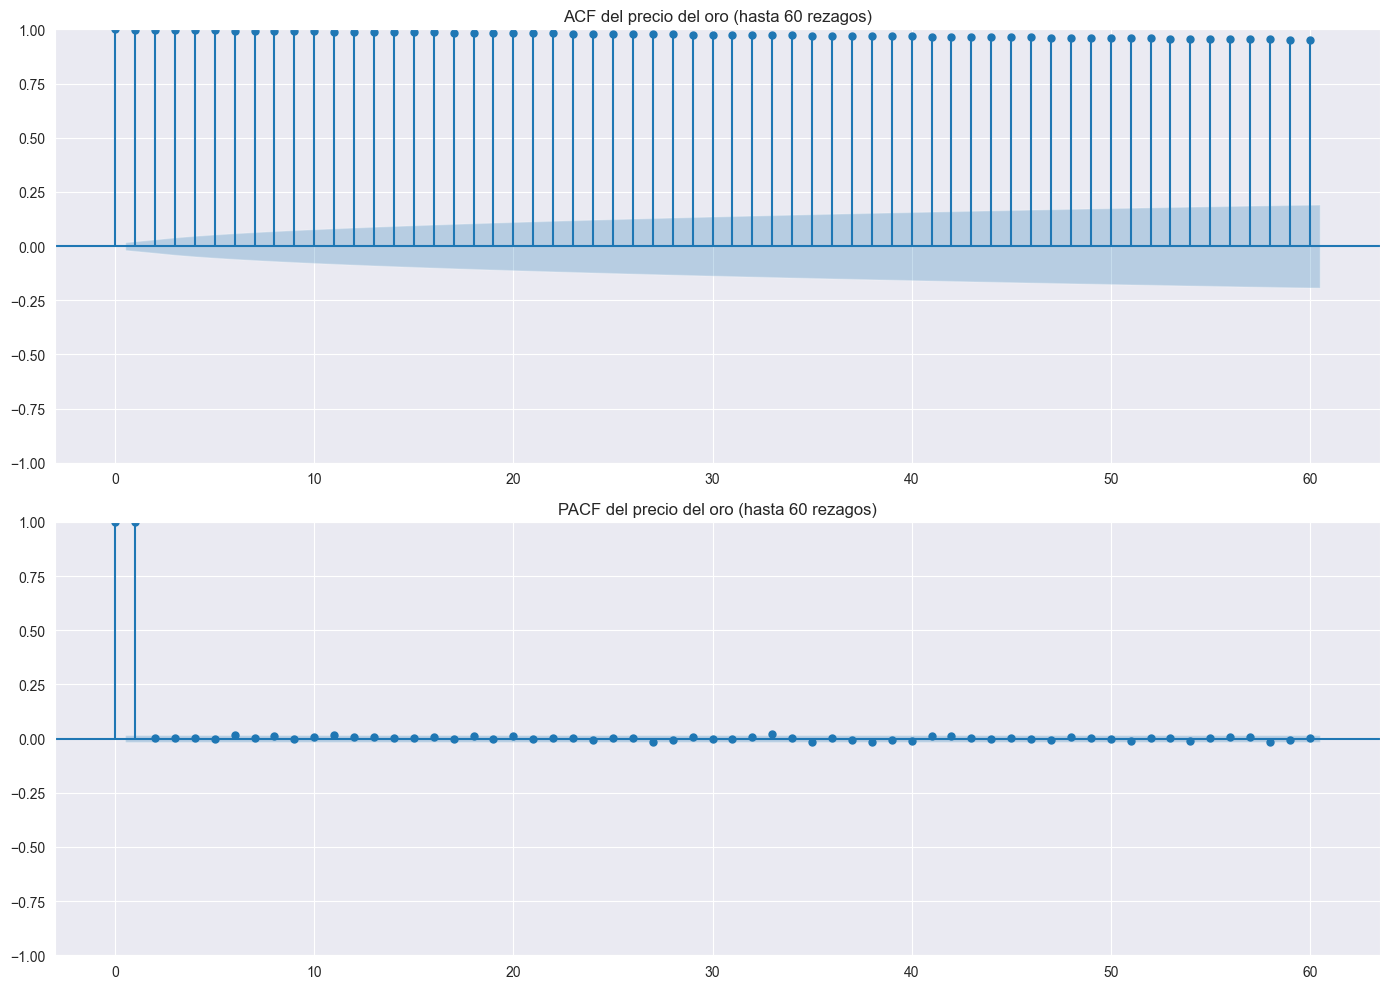

In [14]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(2, 1, figsize=(14, 10))

plot_acf(df[TARGET].dropna(), lags=60, ax=ax[0])
ax[0].set_title("ACF del precio del oro (hasta 60 rezagos)")

plot_pacf(df[TARGET].dropna(), lags=60, ax=ax[1], method="ywm")
ax[1].set_title("PACF del precio del oro (hasta 60 rezagos)")

plt.tight_layout()
plt.show()


## Interpretación del ACF y PACF del precio del oro

El análisis de autocorrelaciones (ACF) y autocorrelaciones parciales (PACF) del precio del oro
permite evaluar la estructura temporal de la serie y determinar si presenta estacionaridad,
tendencias, memoria de largo plazo o componentes autoregresivas relevantes.

### 1. ACF: persistencia extremadamente alta y decaimiento lento
La ACF muestra:

- Correlaciones **muy altas y positivas** en todos los rezagos mostrados (hasta 60 días).
- Un decaimiento **lento y casi lineal**, típico de series con comportamiento no estacionario.
- Memoria de largo plazo donde incluso observaciones distantes siguen fuertemente relacionadas.

Este patrón es característico de procesos con tendencia o raíz unitaria, y es coherente con la
estructura de la distribución del precio del oro, donde la serie presenta crecimiento sostenido y
cambios de régimen.

### 2. PACF: estructura autoregresiva simple
La PACF presenta:

- Un pico muy elevado en el **rezago 1**, indicando que el nivel actual del oro depende casi
  linealmente del valor del día anterior.
- Un segundo pico pequeño.
- Valores prácticamente nulos a partir del rezago 2 en adelante.

Esto sugiere que, una vez explicado el primer rezago, la contribución de rezagos adicionales es
mínima. Este patrón es típico de modelos AR(1) o procesos dominados por una tendencia determinista
más que por una dinámica autoregresiva compleja.

### 3. Implicaciones para el análisis y el modelado

- La combinación ACF + PACF confirma que el oro en niveles **no es estacionario**.
- Para modelos estadísticos clásicos (ARIMA), se necesitaría **al menos una diferenciación**.
- Para modelos de machine learning, será conveniente trabajar con:
  - retornos logarítmicos,
  - diferencias del precio,
  - lags seleccionados del target como features adicionales.
- La persistencia a largo plazo implica que los modelos deben ser capaces de capturar tendencias
  estructurales y episodios no lineales.

### 4. Coherencia con la distribución y los outliers estructurales
La fuerte autocorrelación está alineada con lo observado en la distribución:

- asimetría positiva,
- colas pesadas,
- valores extremos estructurales,
- multimodalidad por ciclos económicos.

Estos factores refuerzan la idea de que el precio del oro tiene comportamiento **no estacionario,
tendencial y con shocks persistentes**.

### Conclusión

El precio del oro (en niveles) es una serie:

- claramente no estacionaria,
- con **alta persistencia temporal**,
- estructura autoregresiva simple,
- memoria de largo plazo,
- y dinámica dominada por tendencias económicas globales.

Estas propiedades deben tratarse explícitamente en las fases de preprocesamiento y feature
engineering para evitar sesgos y mejorar la capacidad predictiva del modelo.


## 9) Visualizaciones EDA para variables numéricas (Regresión num-num)

Además de los análisis multivariantes realizados (PCA, correlaciones, VIF), es necesario
explorar visualmente la relación entre algunas características relevantes y el target
`gold_spot`. Este tipo de inspección visual permite:

- detectar relaciones no lineales o dependencias complejas,
- identificar cambios de régimen económico,
- observar dispersión y ruido,
- evaluar escalas, colas pesadas y asimetría,
- distinguir outliers estructurales de posibles errores.

Dado que el dataset contiene ~60 variables, la estrategia será **seleccionar únicamente
las visualizaciones más representativas** y agruparlas de forma compacta.


### 9.1 Scatterplots: Top 6 variables (Pearson/Spearman combinado)

A continuación se muestran 6 scatterplots (2×3) para las variables con mayor correlación
absoluta con `gold_spot` combinando Pearson y Spearman. Estas gráficas ayudan a:
- comprobar si la relación es lineal o no lineal,
- identificar clusters o rupturas de régimen,
- detectar saturaciones o outliers que dominen la relación.

Los plots se guardan en `stage1_outputs/eda_plots/scatter_top6.png`.


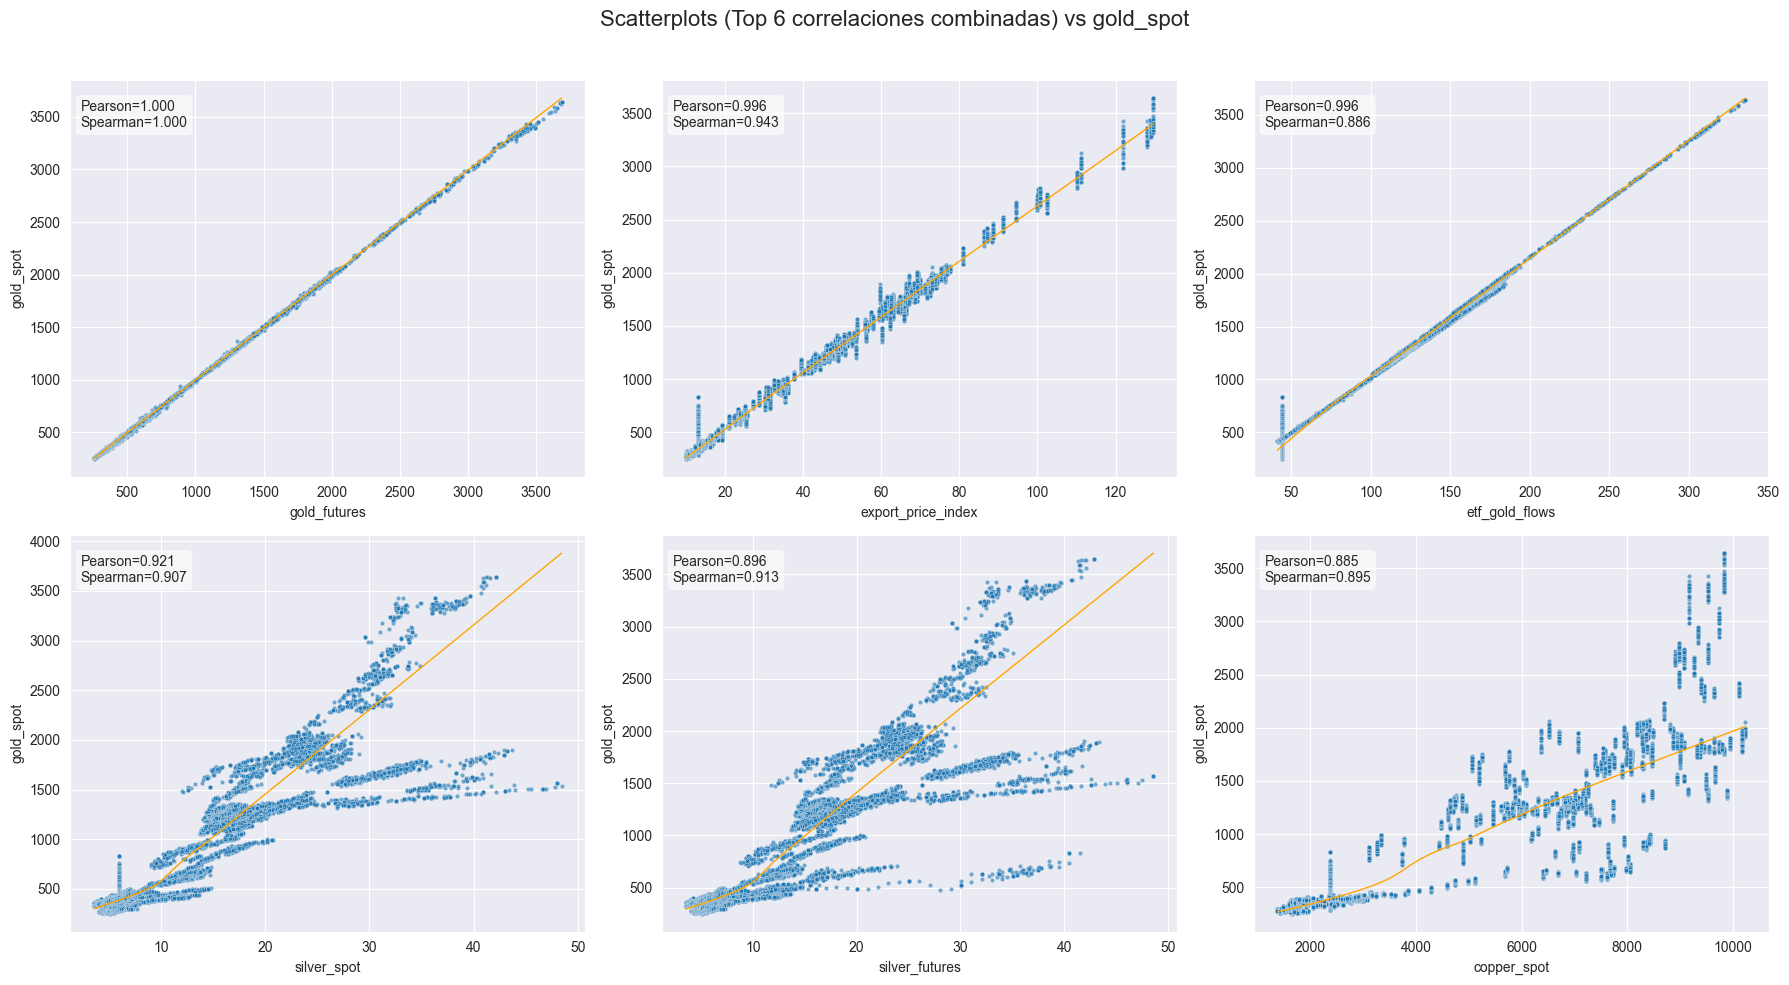

In [15]:
# -------------------------
# Scatterplots top 6
# -------------------------
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import StandardScaler

os.makedirs(os.path.join(OUTPUT_DIR, "eda_plots"), exist_ok=True)

# prepare data: use df imputed for EDA (ffill + bfill) if needed
df_viz = df.copy()
if df_viz.isna().any().any():
    df_viz = df_viz.ffill().bfill()

# features list (exclude date and target)
features = [c for c in df_viz.columns if c not in [DATE_COL, TARGET]]

# compute Pearson and Spearman combined ranking (abs)
pearson = df_viz[features].corrwith(df_viz[TARGET], method="pearson").abs()
spearman = df_viz[features].corrwith(df_viz[TARGET], method="spearman").abs()
combined_rank = (pearson + spearman) / 2
top6 = combined_rank.sort_values(ascending=False).head(6).index.tolist()

# scatter grid
plt.figure(figsize=(18, 10))
for i, feat in enumerate(top6, 1):
    ax = plt.subplot(2, 3, i)
    sns.scatterplot(x=df_viz[feat], y=df_viz[TARGET], s=10, alpha=0.6, ax=ax)
    sns.regplot(x=df_viz[feat], y=df_viz[TARGET], scatter=False, ax=ax,
                lowess=True, line_kws={"color": "orange", "lw":1}, ci=None)
    ax.set_xlabel(feat)
    ax.set_ylabel(TARGET)
    # annotate Pearson / Spearman
    p = pearson.loc[feat]
    s = spearman.loc[feat]
    ax.text(0.02, 0.95, f"Pearson={p:.3f}\nSpearman={s:.3f}",
            transform=ax.transAxes, fontsize=10, va="top", bbox=dict(boxstyle="round", fc="w", alpha=0.6))
plt.suptitle("Scatterplots (Top 6 correlaciones combinadas) vs gold_spot", fontsize=16)
plt.tight_layout(rect=[0,0,1,0.96])
plt.savefig(os.path.join(OUTPUT_DIR, "eda_plots", "scatter_top6.png"), dpi=150)
plt.show()


## Interpretación de los Scatterplots (Top 6 correlaciones combinadas)

Los scatterplots muestran la relación entre `gold_spot` y las variables con mayor correlación
combinada (Pearson + Spearman). Estas visualizaciones permiten analizar la forma funcional de
cada relación y distinguir entre dependencias estrictamente lineales, monotónicas o no lineales.

### 1. Relaciones casi perfectas
Variables como:

- `gold_futures`
- `export_price_index`
- `etf_gold_flows`

muestran una alineación prácticamente exacta con `gold_spot`, con coeficientes cercanos a 1.
Esto confirma relaciones económicas directas y esperadas, donde:

- los futuros del oro siguen casi idénticamente al spot,
- los flujos hacia ETFs de oro reflejan movimientos del mercado en tiempo real,
- ciertos índices agregados replican explícitamente la tendencia del oro.

### 2. Relaciones crecientes con estructura más compleja
Otras variables, especialmente metales industriales y precios spot/futuros relacionados
(`silver_spot`, `silver_futures`, `copper_spot`), mantienen correlación fuerte pero con:

- cambios de pendiente,
- dispersión heterogénea,
- grupos que corresponden a distintos periodos económicos o cambios de régimen.

Estas variables presentan relaciones monotónicas fuertes (alto Spearman), pero no estrictamente
lineales (Pearson menor).

### 3. Conclusión
Los scatterplots confirman:

- la presencia de señales fuertemente redundantes,
- relaciones dominadas por tendencia de largo plazo,
- variaciones estructurales en algunos commodities.

Estos patrones justifican la posterior selección de características y filtrado de multicolinealidad.


### 9.2 Distribuciones (Histogramas + KDE) — target + 4 features representativas

Mostramos la distribución del `gold_spot` y de 4 variables representativas (1 macro, 2 mercado, 1 volatilidad),
en un único lienzo con 5 subplots para mantener la trazabilidad visual compacta.

Implicación: permite ver colas, multimodalidad y asimetría antes de proponer transformaciones.


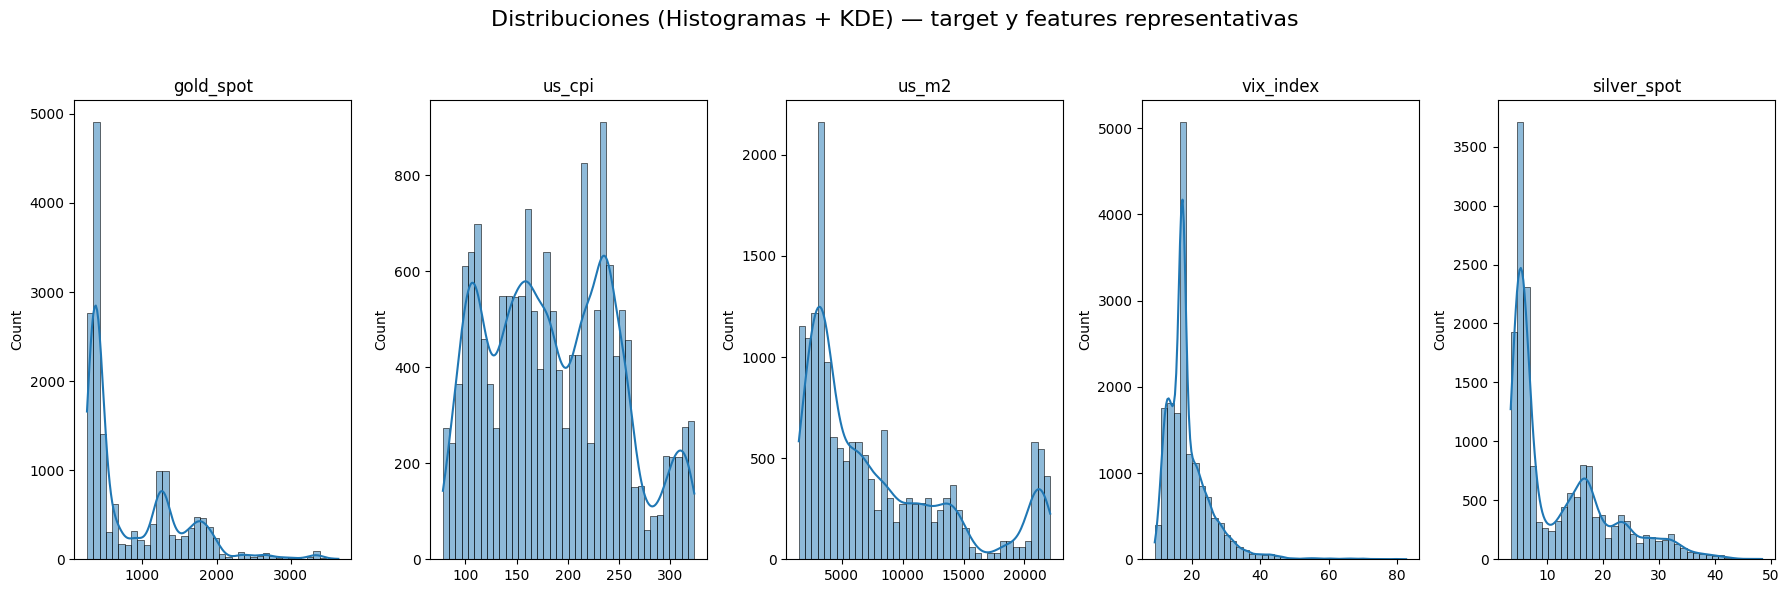

In [16]:
# -------------------------
# Distribuciones: target + 4 variables
# -------------------------
import numpy as np
plt.style.use("default")

# choose 4 representative features: try to pick diverse categories
# if not enough features, fall back to top correlated ones
cand = ["us_cpi", "us_m2", "vix_index", "silver_spot", "bitcoin_price", "us_gdp"]
selected = [f for f in cand if f in df_viz.columns][:4]
if len(selected) < 4:
    selected = combined_rank.drop(TARGET, errors="ignore").head(4).index.tolist()

vars_plot = [TARGET] + selected

plt.figure(figsize=(18, 6))
for i, col in enumerate(vars_plot, 1):
    ax = plt.subplot(1, 5, i)
    sns.histplot(df_viz[col].dropna(), kde=True, stat="count", bins=40, ax=ax)
    ax.set_title(col)
    ax.set_xlabel("")
plt.suptitle("Distribuciones (Histogramas + KDE) — target y features representativas", fontsize=16)
plt.tight_layout(rect=[0,0,1,0.95])
out_path = os.path.join(OUTPUT_DIR, "eda_plots", "distributions_target_plus4.png")
plt.savefig(out_path, dpi=150)
plt.show()

# also save numeric summary
summary = df_viz[vars_plot].describe().T
summary["skewness"] = df_viz[vars_plot].skew()
summary["kurtosis"] = df_viz[vars_plot].kurtosis()
summary.to_csv(os.path.join(OUTPUT_DIR, "eda_plots", "distributions_summary.csv"))


## Interpretación de las distribuciones (Histogramas + KDE)

Se analizaron las distribuciones del target (`gold_spot`) y de variables clave como `us_cpi`,
`us_m2`, `vix_index` y `silver_spot`. Estas gráficas permiten examinar asimetría, colas, régimen
y variabilidad estructural.

### 1. Distribución del precio del oro (`gold_spot`)
La distribución presenta:

- **multimodalidad**, asociada a distintos periodos económicos,
- **asimetría positiva**, típica de activos que aumentan estructuralmente en el tiempo,
- **cola pesada hacia valores altos**, reflejando episodios de fuerte revalorización,
- un gran número de valores considerados estadísticamente “extremos” pero coherentes con cambios de régimen reales.

Estas características indican que el oro no sigue una distribución normal y su dinámica temporal
incluye episodios de crecimiento abrupto.

### 2. Distribuciones de variables macroeconómicas
Variables como `us_cpi` y `us_m2` presentan distribuciones:

- altamente sesgadas,
- concentradas en valores bajos con largos recorridos ascendentes,
- coherentes con su naturaleza acumulativa y con la inflación de largo plazo.

### 3. Distribución del `vix_index`
El VIX se concentra principalmente en valores bajos, con una cola larga asociada a crisis
financieras (2008, 2020).

### 4. Distribución de `silver_spot`
Presenta una estructura similar al oro, incluyendo multimodalidad y asimetría, reflejando
relación estructural entre ambos metales.

### 5. Conclusión
Las distribuciones confirman:

- no normalidad,
- colas pesadas,
- cambios de régimen,
- dinámicas temporales heterogéneas.

Esto será relevante para transformaciones posteriores como retornos logarítmicos y
estandarización robusta.


### 9.3 Mutual Information (MI) y 11.4 F-test (Top 15)

- MI detecta dependencias no lineales; se muestran las 15 señales con mayor MI.
- F-test detecta fuerza de asociación lineal; se muestran las 15 mejores puntuaciones.
- Ambos se guardan como CSV y se visualizan en barplots.


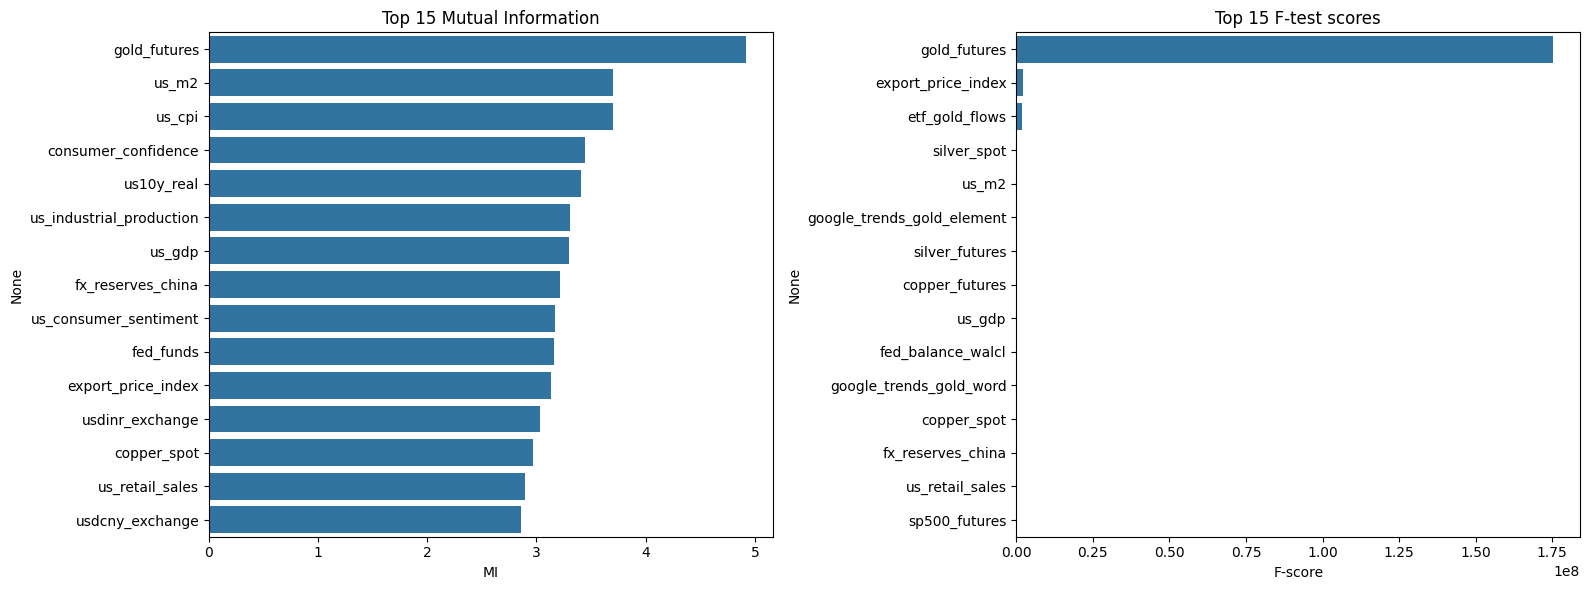

In [17]:
# -------------------------
# Mutual Information + F-test (completo + top15)
# -------------------------
from sklearn.feature_selection import mutual_info_regression, f_regression
import numpy as np

os.makedirs(os.path.join(OUTPUT_DIR, "eda_plots"), exist_ok=True)

# prepare X and y (df_viz ya imputado con ffill+bfill)
X = df_viz[features].copy().select_dtypes(include=[np.number])
y = df_viz[TARGET].copy()

# eliminar filas donde falte target (no debería ocurrir, pero por seguridad)
mask = y.dropna().index
X = X.loc[mask]
y = y.loc[mask]

# -------------------------
# Mutual Information
# -------------------------
mi = mutual_info_regression(X, y)
mi_series = pd.Series(mi, index=X.columns).sort_values(ascending=False)

# guardar MI completa
mi_series.to_csv(os.path.join(OUTPUT_DIR, "eda_plots", "mi_all_features.csv"))

# top 15
mi_top15 = mi_series.head(15)
mi_top15.to_csv(os.path.join(OUTPUT_DIR, "eda_plots", "mi_top15.csv"))

# -------------------------
# F-test
# -------------------------
f_vals, p_vals = f_regression(X, y)
f_series = pd.Series(f_vals, index=X.columns).sort_values(ascending=False)
p_series = pd.Series(p_vals, index=X.columns).loc[f_series.index]  # alineado

# guardar F-test completo
f_df = pd.DataFrame({
    "F_value": f_series,
    "p_value": p_series
})
f_df.to_csv(os.path.join(OUTPUT_DIR, "eda_plots", "f_test_all_features.csv"))

# top 15
f_top15 = f_series.head(15)
f_top15.to_csv(os.path.join(OUTPUT_DIR, "eda_plots", "f_test_top15.csv"))

# -------------------------
# Guardar MI + F-test juntos (muy útil)
# -------------------------
combined_df = pd.DataFrame({
    "MI": mi_series,
    "F_value": f_series,
    "p_value": p_series
})
combined_df.to_csv(os.path.join(OUTPUT_DIR, "eda_plots", "mi_f_test_combined.csv"))

# -------------------------
# Plot (solo top15)
# -------------------------
plt.figure(figsize=(16, 6))

ax = plt.subplot(1,2,1)
sns.barplot(x=mi_top15.values, y=mi_top15.index, orient="h", ax=ax)
ax.set_title("Top 15 Mutual Information")
ax.set_xlabel("MI")

ax = plt.subplot(1,2,2)
sns.barplot(x=f_top15.values, y=f_top15.index, orient="h", ax=ax)
ax.set_title("Top 15 F-test scores")
ax.set_xlabel("F-score")

plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, "eda_plots", "mi_and_f_test_top15.png"), dpi=150)
plt.show()


## Interpretación de Mutual Information (MI) y F-test

La Mutual Information (MI) y el F-test permiten evaluar la relación entre cada característica
y el precio del oro desde perspectivas complementarias: no lineal (MI) y lineal (F-test).

### 1. Mutual Information (MI)
La MI detecta dependencias no lineales. Las variables con mayor MI incluyen:

- `gold_futures`
- `us_m2`
- `us_cpi`
- `consumer_confidence`
- `us10y_real`
- `us_industrial_production`
- `us_gdp`

Esto indica que varias variables macroeconómicas tienen una relación informativa profunda con la
tendencia del oro, incluso si la relación no es estrictamente lineal.

### 2. F-test
El F-test destaca la fuerza de la relación lineal entre las características y el target.

- `gold_futures` produce un valor extremadamente alto, indicando casi equivalencia estadística con `gold_spot`.
- Los F-scores de las demás variables son mucho menores, lo que sugiere relaciones lineales más débiles.

### 3. Conclusión
Los resultados combinados muestran que:

- ciertos activos (metales preciosos) duplican la señal del oro,
- varias variables macroeconómicas aportan información estructural,
- existen dependencias no lineales detectables solo por MI.

Esto refuerza la necesidad de filtrado y selección de características en etapas posteriores.


### 9.4 Heatmap compacto de correlaciones (Top 15 con el target)

Se construye un heatmap compacto con las 15 variables más correlacionadas (Pearson abs).
Esto facilita la identificación de pares fuertemente redundantes dentro del subconjunto más relevante.


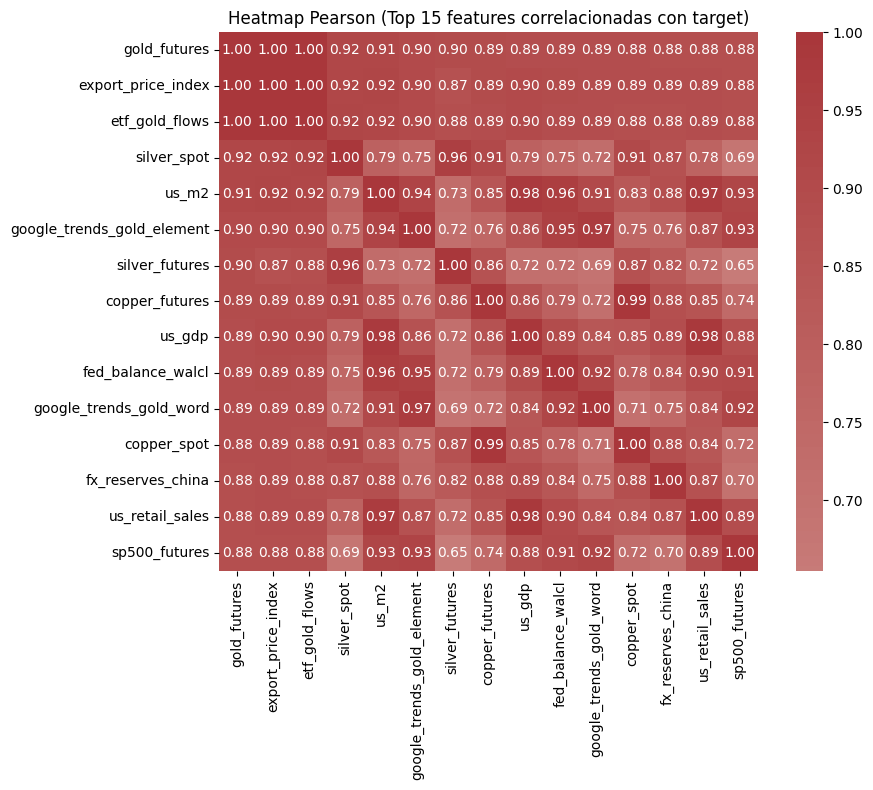

In [18]:
# -------------------------
# Heatmap compacto top15 correlaciones
# -------------------------
pearson_all = df_viz[features].corr(method="pearson").abs()
corr_with_target = df_viz[features].corrwith(df_viz[TARGET], method="pearson").abs()
top15 = corr_with_target.sort_values(ascending=False).head(15).index.tolist()

plt.figure(figsize=(10, 8))
corr_small = df_viz[top15].corr(method="pearson")
sns.heatmap(corr_small, annot=True, fmt=".2f", cmap="vlag", center=0, square=True)
plt.title("Heatmap Pearson (Top 15 features correlacionadas con target)")
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, "eda_plots", "heatmap_top15.png"), dpi=150)
plt.show()

# save matrix
corr_small.to_csv(os.path.join(OUTPUT_DIR, "eda_plots", "heatmap_top15_matrix.csv"))


## Interpretación del Heatmap compacto (Top 15 correlaciones)

El heatmap sintetiza las correlaciones entre las 15 características con mayor relación con el
target, permitiendo observar redundancia y agrupaciones estructurales.

### 1. Bloques de correlación casi perfecta
Variables relacionadas directamente con el oro y otros metales forman un bloque con correlaciones
≥ 0.90:

- `gold_futures`
- `silver_futures`
- `silver_spot`
- `copper_futures`
- `etf_gold_flows`

Esto indica fuerte redundancia y dependencia compartida respecto a shocks de mercado y demanda
de metales preciosos.

### 2. Grupo macroeconómico
Variables como:

- `us_m2`
- `us_cpi`
- `us_gdp`
- `retail_sales`

presentan correlaciones altas entre sí, reflejando que son indicadores que evolucionan con
tendencias comunes en el tiempo.

### 3. Señales estructuralmente conectadas
Otras series como `fx_reserves_china`, `federal_balance` o `copper_spot` también muestran alta
correlación con múltiples grupos.

### 4. Conclusión
El heatmap confirma:

- la existencia de clusters de señales redundantes,
- que la información dominante proviene de pocos factores latentes (coherente con el PCA),
- y que la selección de características debe considerar eliminar duplicados estadísticos.



### 9.5 Pairplot reducido (4 variables representativas)

Se construye un pairplot reducido con 4 variables seleccionadas de diferentes familias
(commodity, macro, volatilidad, target). Sirve para inspeccionar interacciones simples.


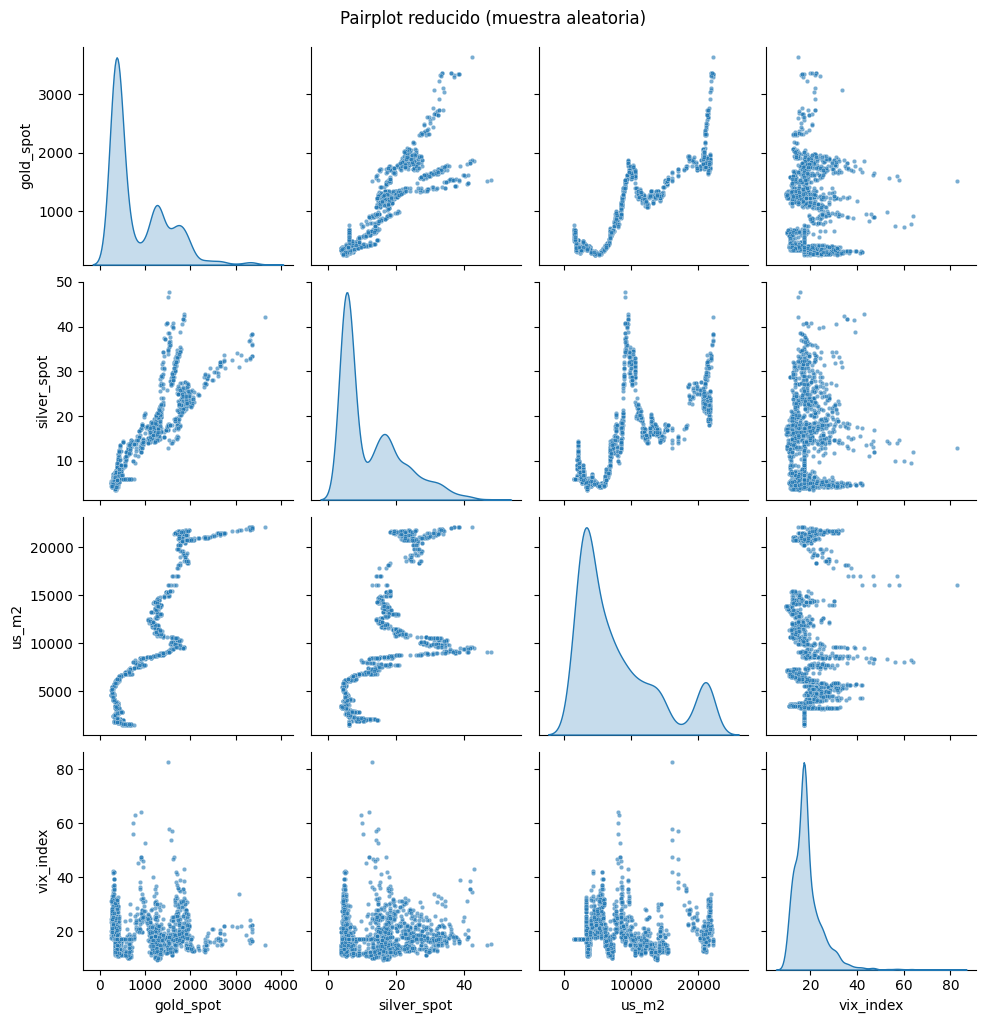

In [19]:
# -------------------------
# Pairplot reducido
# -------------------------
pair_vars = [TARGET]
# try to pick 3 others: one commodity, one macro, one risk
candidates = ["silver_spot", "us_m2", "vix_index", "bitcoin_price", "us_gdp", "us_cpi"]
selected = [c for c in candidates if c in df_viz.columns][:3]
pair_vars += selected

import seaborn as sns
sns.pairplot(df_viz[pair_vars].dropna().sample(min(2000, len(df_viz))), diag_kind="kde", plot_kws={"s":10, "alpha":0.6})
plt.suptitle("Pairplot reducido (muestra aleatoria)", y=1.02)
plt.savefig(os.path.join(OUTPUT_DIR, "eda_plots", "pairplot_reduced.png"), dpi=150)
plt.show()


## Interpretación del Pairplot reducido

El pairplot resume la relación conjunta entre un subconjunto representativo de variables:
`gold_spot`, `silver_spot`, `us_m2` y `vix_index`.

### 1. Relaciones commodity–commodity
La relación entre `gold_spot` y `silver_spot` muestra:

- dependencia positiva clara,
- estructura no lineal con cambios de pendiente,
- varios clusters temporales asociados a cambios de régimen (crisis, burbujas, consolidaciones).

### 2. Variables macroeconómicas
`us_m2` muestra una tendencia marcadamente creciente con:

- escalones de crecimiento,
- muy baja dispersión interna,
- comportamiento típico de series macroeconómicas acumulativas.

Esto confirma que `m2` está dominada por tendencia más que por variación puntual.

### 3. Índice de volatilidad (VIX)
El `vix_index` presenta:

- alta dispersión,
- asimetría marcada,
- picos aislados correspondientes a episodios de estrés financiero.

### 4. Conclusión
El pairplot confirma que:

- las dinámicas entre commodities, macroeconomía y volatilidad son muy distintas,
- existen grupos de características con patrones monotónicos, otros con alta dispersión,
  y otros dominados por tendencia,
- los modelos deberán ser robustos a no linealidad y heterogeneidad estructural.

Este análisis complementa la lectura obtenida de correlaciones, PCA y MI.


### Cierre del EDA

En la fase de Análisis Exploratorio de Datos (EDA) se han llevado a cabo las siguientes actividades principales:

- **Inspección de missingness y recorte temporal.**
  Visualización de patrones de valores faltantes y elección de un punto de partida temporal razonado para el análisis exploratorio (basado en la disponibilidad del `target` y variables clave como `geopolitical_risk`).

- **Generación del dataset exploratorio (imputación temporal simple + escalado).**
  Construcción de una versión completa del dataset mediante `ffill` + `bfill` (justificado únicamente para EDA) y normalización mediante `StandardScaler` con el objetivo de habilitar cálculos multivariantes (correlaciones, PCA, VIF, etc.). *Este dataset es exclusivamente para EDA y no debe emplearse en entrenamiento ni validación.*

- **PCA exploratorio y análisis de varianza explicada.**
  Ejecución de PCA para evaluar la dimensionalidad efectiva y detectar drivers latentes — resultado: gran parte de la varianza concentrada en pocas componentes, lo que confirma alta redundancia.

- **Cálculo de correlaciones (Pearson y Spearman) y ranking con el target.**
  Matrices de correlación completas y listados con los `top` features según Pearson y Spearman para identificar relaciones lineales y monotónicas.

- **Diagnóstico preliminar de multicolinealidad (VIF).**
  Cálculo exploratorio de VIF para evaluar la inflación de varianza en las características; se detectaron valores extremadamente altos para varias series, evidencia clara de redundancia.

- **Clustering por correlación (definido como método).**
  Definición de una estrategia para agrupar variables altamente similares (threshold alto, p. ej. ≥ 0.97) con el objetivo de seleccionar representantes por cluster en fases posteriores.

- **Visualizaciones numéricas relevantes (regresión num-num):**
  Scatterplots representativos, histogramas + KDE, boxplots, ACF/PACF del target, MI (Mutual Information), F-test, pairplot reducido y un heatmap compacto de las 15 variables más correlacionadas.

---

**Archivos y artefactos generados durante el EDA**

- `dataset_imputado_escalado_simple.csv` — versión completa e imputada **solo para EDA**.
- `feature_stats.csv` — estadísticas por feature (missingness, percentiles, etc.).
- `feature_corr_with_target.csv` — correlaciones de cada feature con `gold_spot`.
- `feature_corr_matrix_pearson.csv` — matriz de correlación Pearson (completa).
- `feature_corr_matrix_spearman.csv` — matriz de correlación Spearman (completa).
- `vif_exploratorio.csv` — resultados del cálculo de VIF exploratorio.
- Figuras guardadas en `stage1_outputs/eda_plots/` (heatmaps, PCA, scatterplots, MI/F-test, ACF/PACF, etc.).

---

**Conclusión y pasos siguientes**

La fase de EDA ha confirmado que:

- el dataset contiene **alta redundancia y multicolinealidad** (prevalencia de pares spot–futures y grupos de metales/variables macro correlacionadas);
- el `target` presenta **no estacionaridad, asimetría y cambios de régimen** que deberán ser tratados en el preprocesamiento y feature engineering;
- existen señales con alta relevancia informativa (según Pearson/Spearman/MI) que deben validarse económicamente antes de decidir su inclusión definitiva.

Con esta base se avanza a la siguiente fase:

1. **Consolidar el subconjunto candidato de features** (resultado del clustering por correlación + selección estratégica de representantes).
2. **Aplicar reducción final por VIF y validación económica/manual** para escoger el set que iremos a modelar.
3. **Diseñar pipelines de preprocesado anidados** (imputación controlada + escalado) para asegurar que la validación temporal quede libre de data leakage y poder entrenar/validar modelos de forma robusta.

---


# Preprocessing —

## 2.4 Selección de un punto de partida estratégico y visualización del target

El primer recorte a partir de 1980 garantiza que el target (`gold_spot`) está disponible.
Sin embargo, este punto de inicio no coincide necesariamente con una zona de **alta densidad de datos**
para el resto de variables.

Para mejorar la homogeneidad temporal del dataset, buscamos una feature cuyo primer registro válido
coincida con un tramo donde un mayor número de series comienzan simultáneamente. En el contexto de
este proyecto, la variable **`geopolitical_risk`** es un buen candidato, ya que:

- empieza más tarde que el target, pero no demasiado,
- coincide con el inicio de muchas series financieras relevantes,
- reduce notablemente el volumen de NaNs residuales,
- y proporciona una base temporal más coherente para análisis multivariantes (correlaciones, PCA, VIF).

Por ello, identificamos el primer año en el que `geopolitical_risk` tiene datos válidos
y utilizamos ese año como **START_YEAR estratégico provisional**.

Antes de usar definitivamente este punto, es importante visualizar el comportamiento del target
a partir de dicho año. Esto nos permitirá confirmar que:

- el target tiene una estructura temporal razonable,
- no existe un ruido excesivo al inicio del período,
- y la serie conserva suficiente historial para el análisis.

Para ello graficamos la evolución del precio del oro desde el nuevo año de inicio.


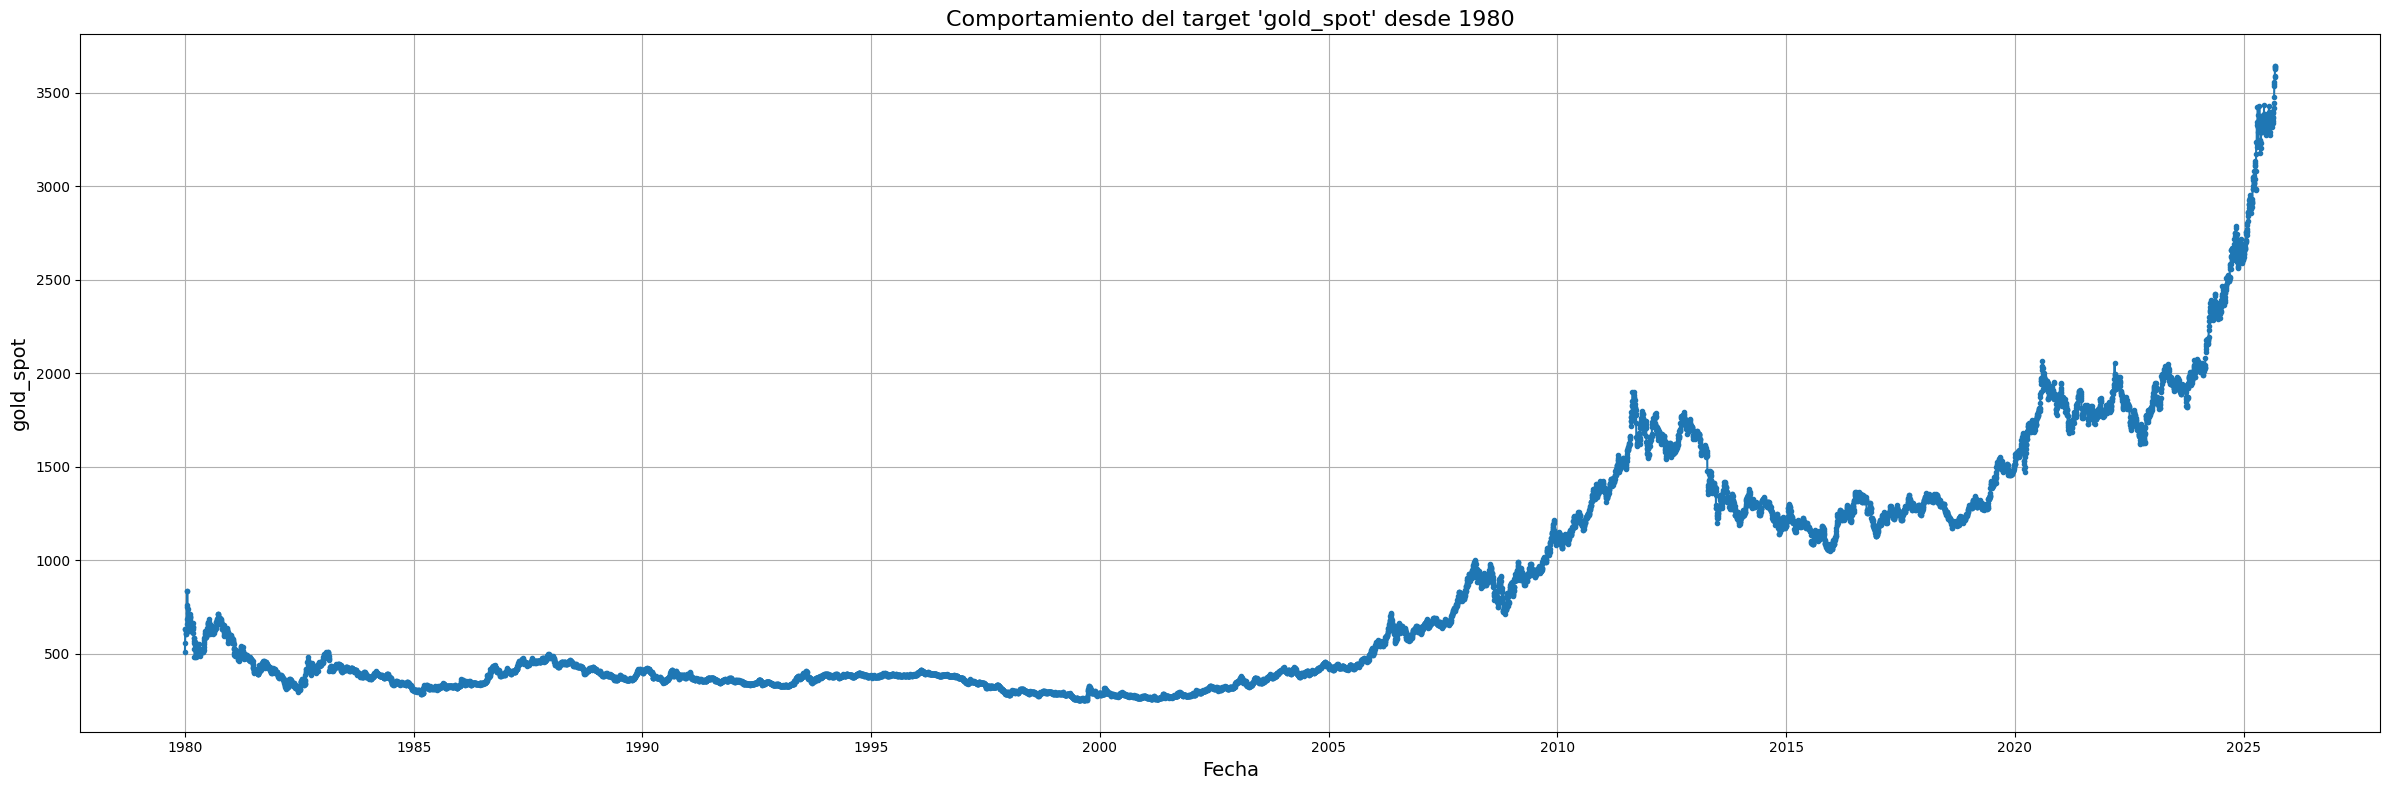

In [20]:
# -------------------------
# 2.X Visualización del target desde el primer año válido (pantalla completa)
# -------------------------
df_viz = df.copy()
plt.figure(figsize=(24, 8))
plt.plot(df_viz[DATE_COL], df_viz[TARGET], marker='o', linestyle='-', markersize=3)
plt.title(f"Comportamiento del target '{TARGET}' desde {START_YEAR}", fontsize=16)
plt.xlabel("Fecha", fontsize=14)
plt.ylabel(TARGET, fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()


In [21]:
# -------------------------
# 2.X Recorte definitivo del dataset según 'geopolitical_risk'
# -------------------------
# Primer año con valor válido en 'geopolitical_risk'
START_YEAR = df.loc[df['geopolitical_risk'].notna(), DATE_COL].dt.year.min()
print(f"Punto de partida definitivo: {START_YEAR}")

# Recortar dataset desde ese año
df = df[df[DATE_COL].dt.year >= START_YEAR].reset_index(drop=True)
print(f"Dataset filtrado desde {START_YEAR}: {len(df)} filas")


Punto de partida definitivo: 1985
Dataset filtrado desde 1985: 14867 filas


Visualizando patrón de valores nulos...


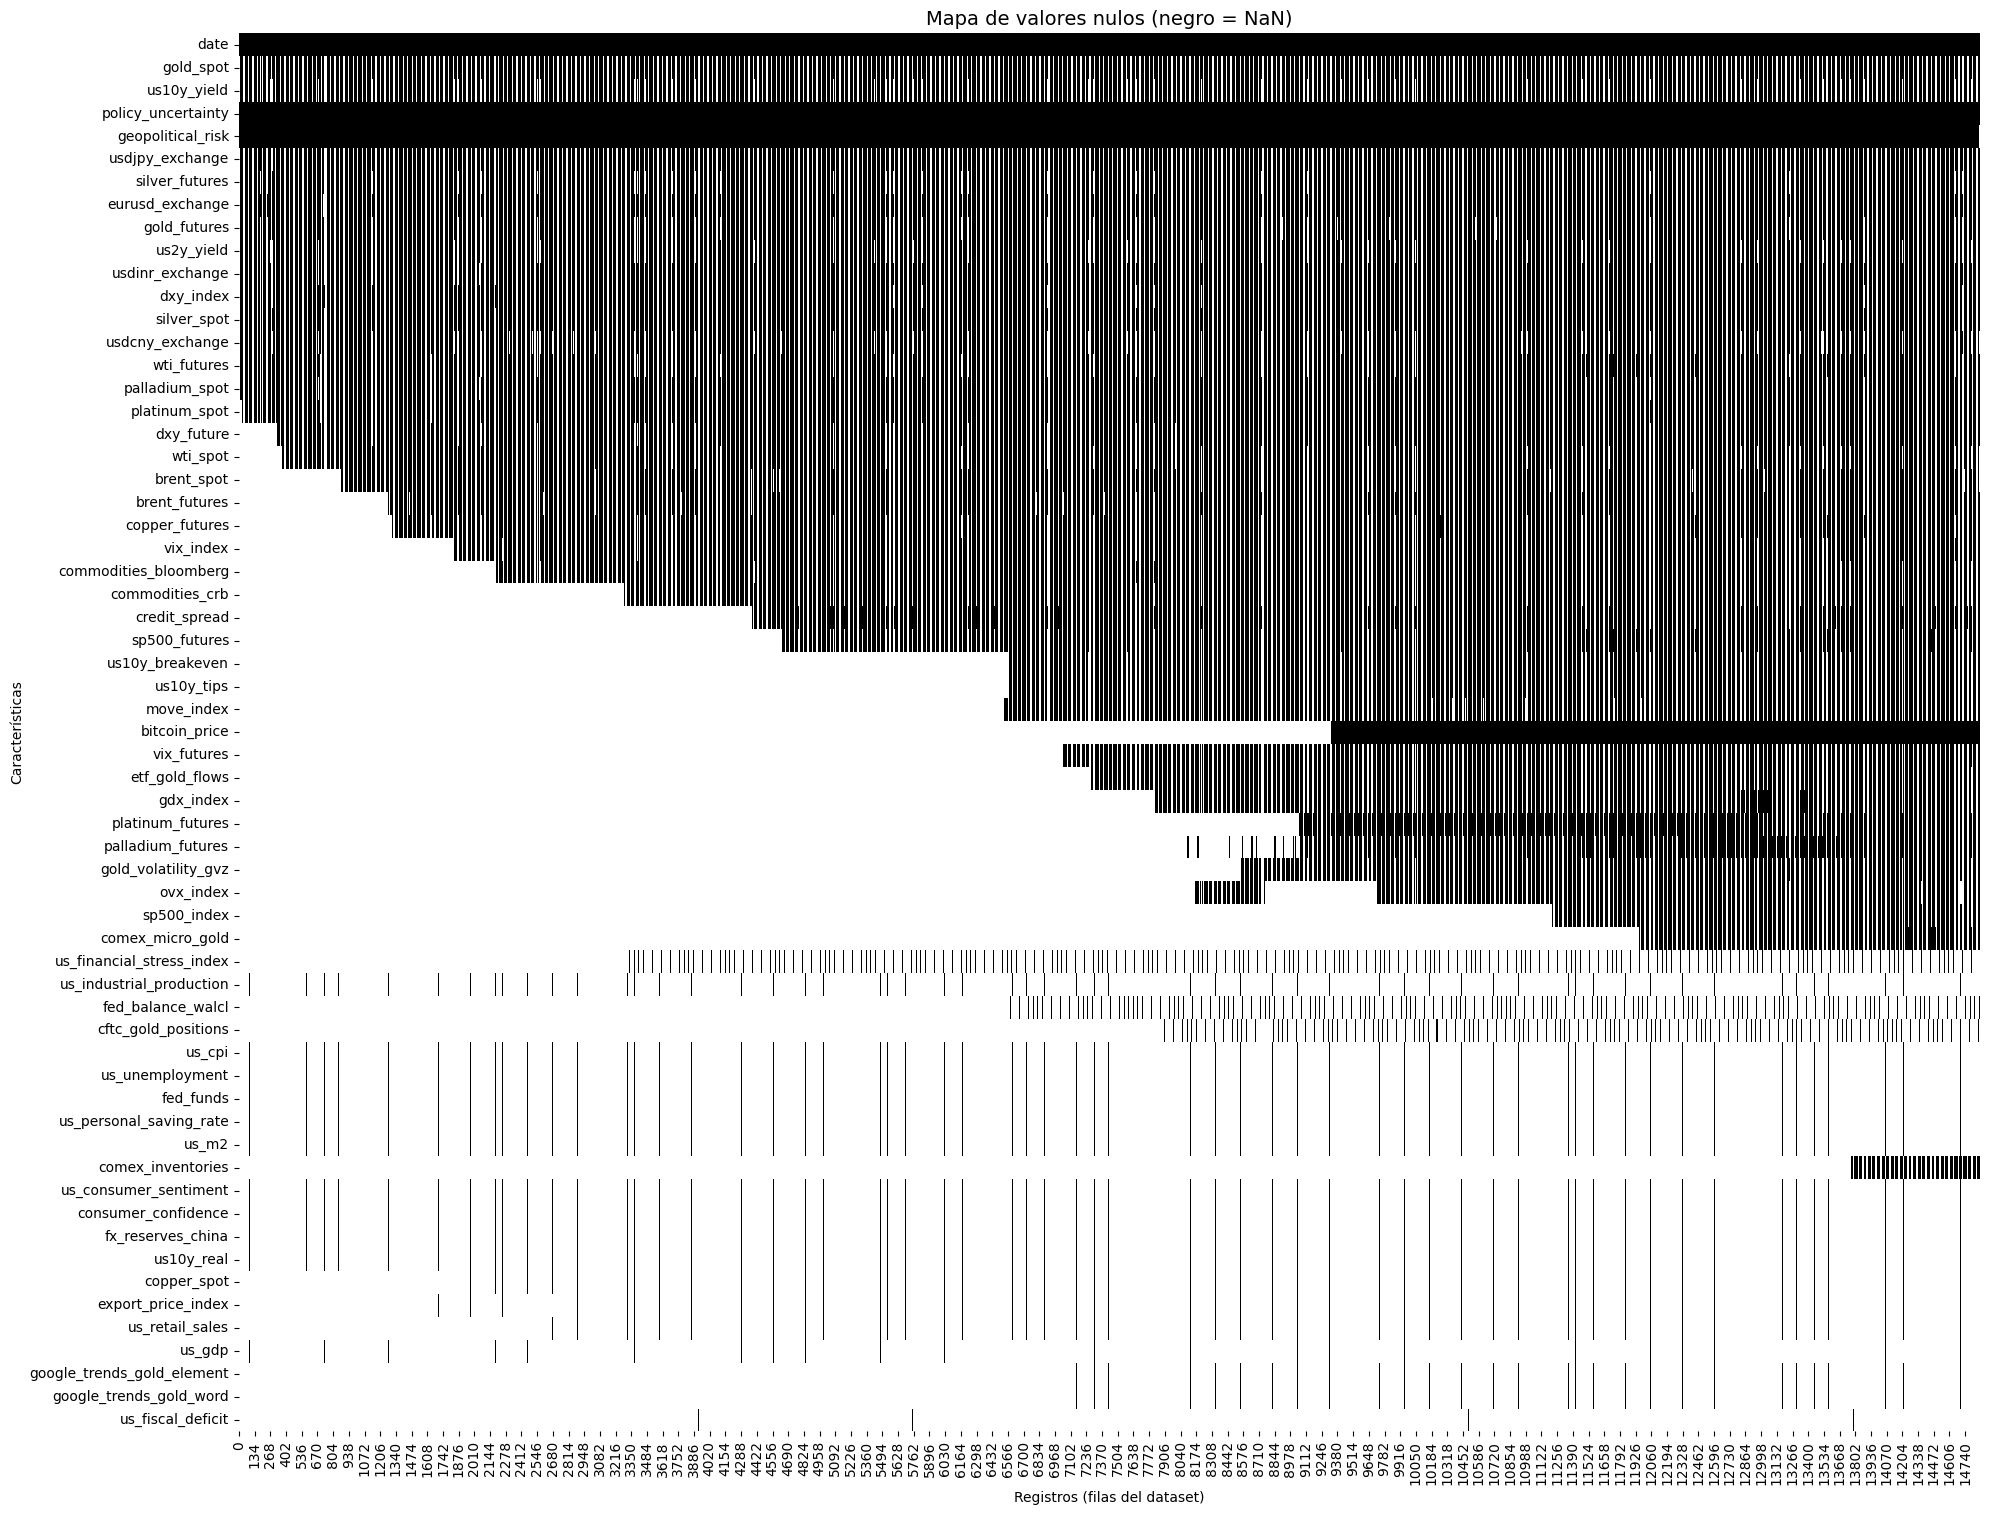

In [22]:
# -------------------------
# 2.1 Visualización directa de los valores nulos (mapa binario ancho)
# -------------------------
print("Visualizando patrón de valores nulos...")
null_mask = df.isnull().astype(int)
plt.figure(figsize=(20, max(6, len(df.columns) * 0.25)))
sns.heatmap(
    null_mask.T,
    cmap=["black", "white"],
    cbar=False
)
plt.title("Mapa de valores nulos (negro = NaN)", fontsize=14)
plt.xlabel("Registros (filas del dataset)")
plt.ylabel("Características")
plt.tight_layout()
plt.show()


## Interpretación del recorte definitivo (1985) y comportamiento del target

Después de identificar 1985 como el primer año con valores válidos en la variable `geopolitical_risk`,
recortamos el dataset a partir de esa fecha con el objetivo de obtener una base temporal más homogénea
para el análisis multivariante. El nuevo tamaño resultante (14 867 filas) confirma que se mantiene una
longitud histórica amplia.

### Comportamiento del target (`gold_spot`) desde 1985
La gráfica muestra que el precio del oro presenta un comportamiento estable y continuo desde 1985,
sin huecos ni rupturas. Algunos aspectos destacables:

- Entre 1985 y principios de los 2000, el oro mantiene una fase de consolidación prolongada con baja
volatilidad relativa.
- A partir de 2005 comienza un ciclo claramente alcista que culmina en el rally intenso de 2011.
- Tras una corrección entre 2013 y 2018, vuelve a mostrar una fase de fortalecimiento continuo hasta
alcanzar nuevos máximos históricos a partir de 2020.
- No se observan anomalías, oscilaciones espurias ni comportamientos ruidosos que desaconsejen
trabajar con este tramo temporal.

En conjunto, el target se comporta de manera sólida y consistente, por lo que **1985 es un punto de
inicio adecuado también desde el punto de vista del oro**.

---

### Patrón de missingness tras el recorte a 1985
El heatmap actualizado muestra un escenario mucho más equilibrado que el observado previamente:

#### **1. Variables diarias con excelente cobertura**
Series como:
- `gold_futures`, `silver_futures`, `wti_futures`,
- `us10y_yield`, `us2y_yield`,
- `dxy_index`, `eurusd_exchange`,
- índices como `vix_index`, `sp500_index`, `commodities_bloomberg`,

aparecen casi completamente en blanco desde 1985, indicando datos continuos y de alta calidad.

#### **2. Variables de frecuencia baja visibles en la parte inferior**
Los indicadores mensuales, trimestrales y anuales muestran patrones de puntos aislados característicos
de su naturaleza (por ejemplo, `cpi`, `m2`, `retail_sales`, `us_gdp`, `us_fiscal_deficit`).
Esto es normal y no representa un problema para el análisis, ya que mantienen coherencia temporal a
partir de estas fechas.

#### **3. Aún existen variables que comienzan más tarde**
Algunas series modernas aparecen con franjas negras prolongadas incluso tras el recorte:

- `bitcoin_price`,
- `ovx_index`,
- ciertos futuros y ETFs,
- algunos indicadores de volatilidad o estrés financiero.

Estas variables son estructuralmente recientes y no afectan negativamente al tramo de datos restantes;
sencillamente entrarán al EDA con menos longitud histórica.

#### **4. Equilibrio logrado con el recorte**
El recorte a 1985 consigue:
- reducir drásticamente el número de NaNs,
- mejorar la densidad informativa,
- sincronizar muchas series principales,
- y mantener un historial suficientemente largo para el modelado.

Aunque se podrían evaluar recortes alternativos (1990 o 2000) para compararlos, **1985 ofrece una
relación óptima entre longitud histórica y densidad de datos**.

---

### Conclusión
La visualización conjunta de:
- el target (`gold_spot`) desde 1985, y
- el nuevo mapa de missingness

confirma que **1985 es un inicio temporal robusto y bien justificado**, tanto desde la perspectiva del
activo objetivo como desde la disponibilidad y coherencia de las variables exógenas.

En adelante, este será el punto de partida para el resto del análisis exploratorio (correlaciones,
PCA, VIF, modelos preliminares, etc.).


## 2.5 Zoom temporal: análisis detallado de missingness por ventanas de tiempo

Después de fijar **1985** como punto de inicio estratégico, es útil examinar con mayor detalle el patrón de disponibilidad de datos (*missingness*) durante periodos concretos.

Este análisis con ventanas temporales cumple **dos objetivos**:

1.  **Verificar la idoneidad del año de inicio (1985):** Observando los primeros 10 años tras el recorte (1985–1995), podemos evaluar si las series comienzan efectivamente en esta franja o si aún existen huecos importantes.
2.  **Comparar con un periodo reciente (2015–2025):** Esto permite visualizar la evolución de la densidad del *dataset* con el paso del tiempo, confirmando que las series modernas tienen registros sólidos en fechas recientes.

Al contrastar estos dos rangos temporales —uno antiguo y uno actual— obtenemos una visión más clara de:
* Qué grupos de variables son históricos y cuáles son modernos.
* Cómo cambia la disponibilidad según la frecuencia (diaria, mensual, anual).
* Hasta qué punto el recorte a 1985 es razonable y consistente.

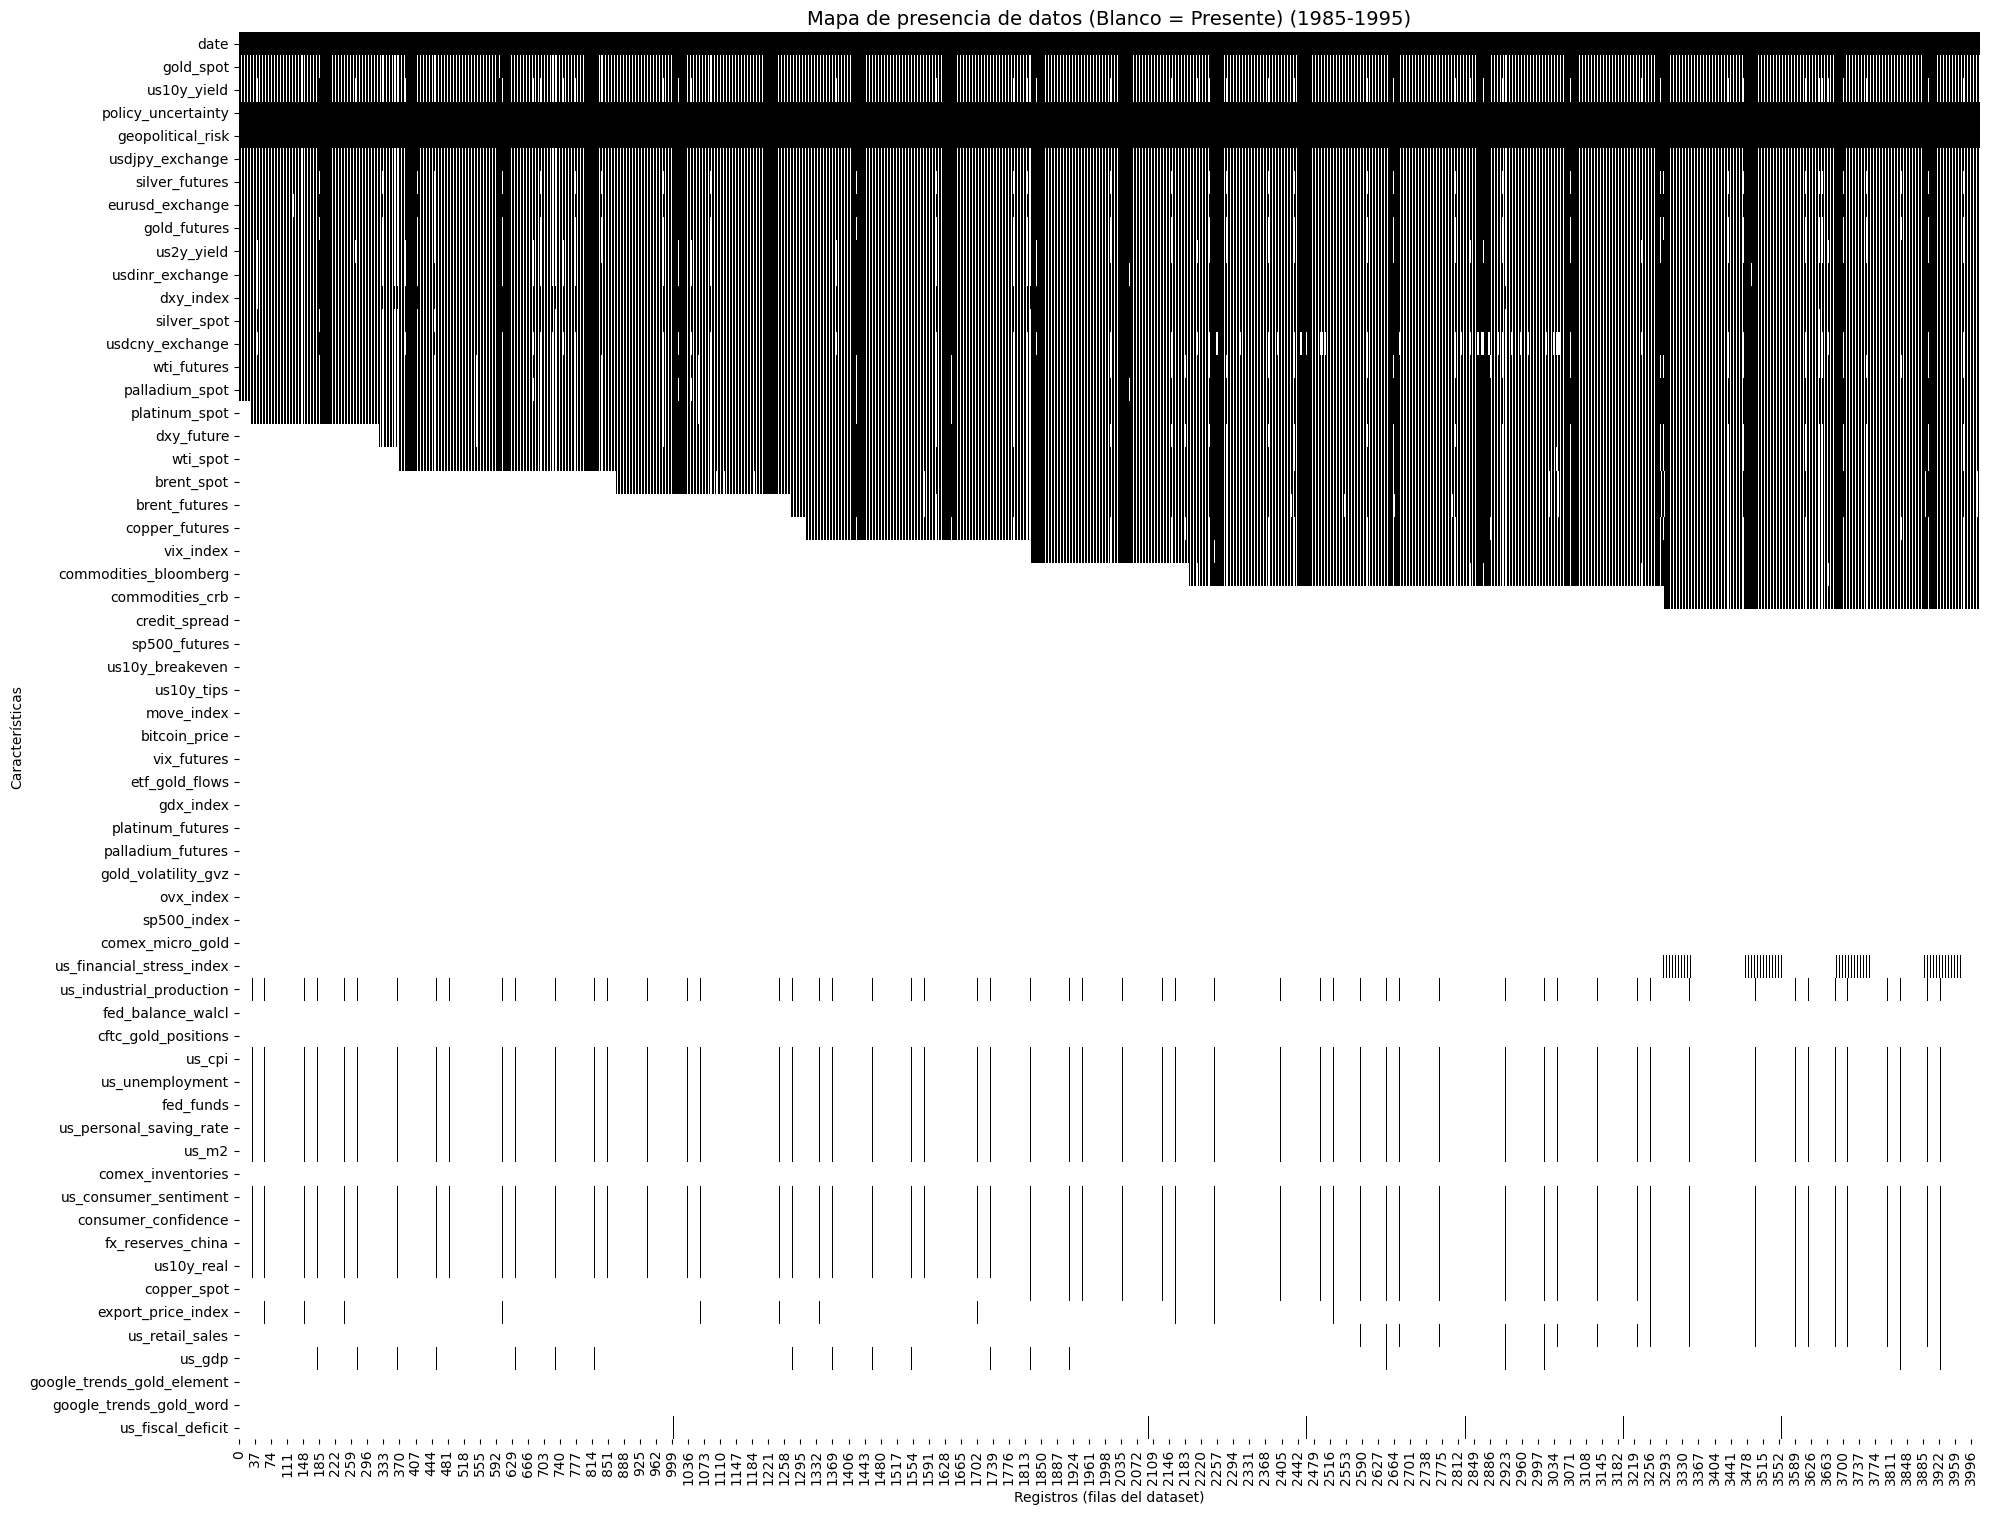

In [23]:
df_viz = df.copy()
zoom_start_year = START_YEAR
zoom_end_year   = START_YEAR + 10

df_viz = df_viz[(df_viz[DATE_COL].dt.year >= zoom_start_year) &
                (df_viz[DATE_COL].dt.year <= zoom_end_year)]

null_mask = df_viz.isnull().astype(int)
plt.figure(figsize=(20, max(6, len(df_viz.columns) * 0.25)))
sns.heatmap(
    null_mask.T,
    cmap=["black", "white"],
    cbar=False
)
plt.title(f"Mapa de presencia de datos (Blanco = Presente) ({zoom_start_year}-{zoom_end_year})", fontsize=14)
plt.xlabel("Registros (filas del dataset)")
plt.ylabel("Características")
plt.tight_layout()
plt.show()

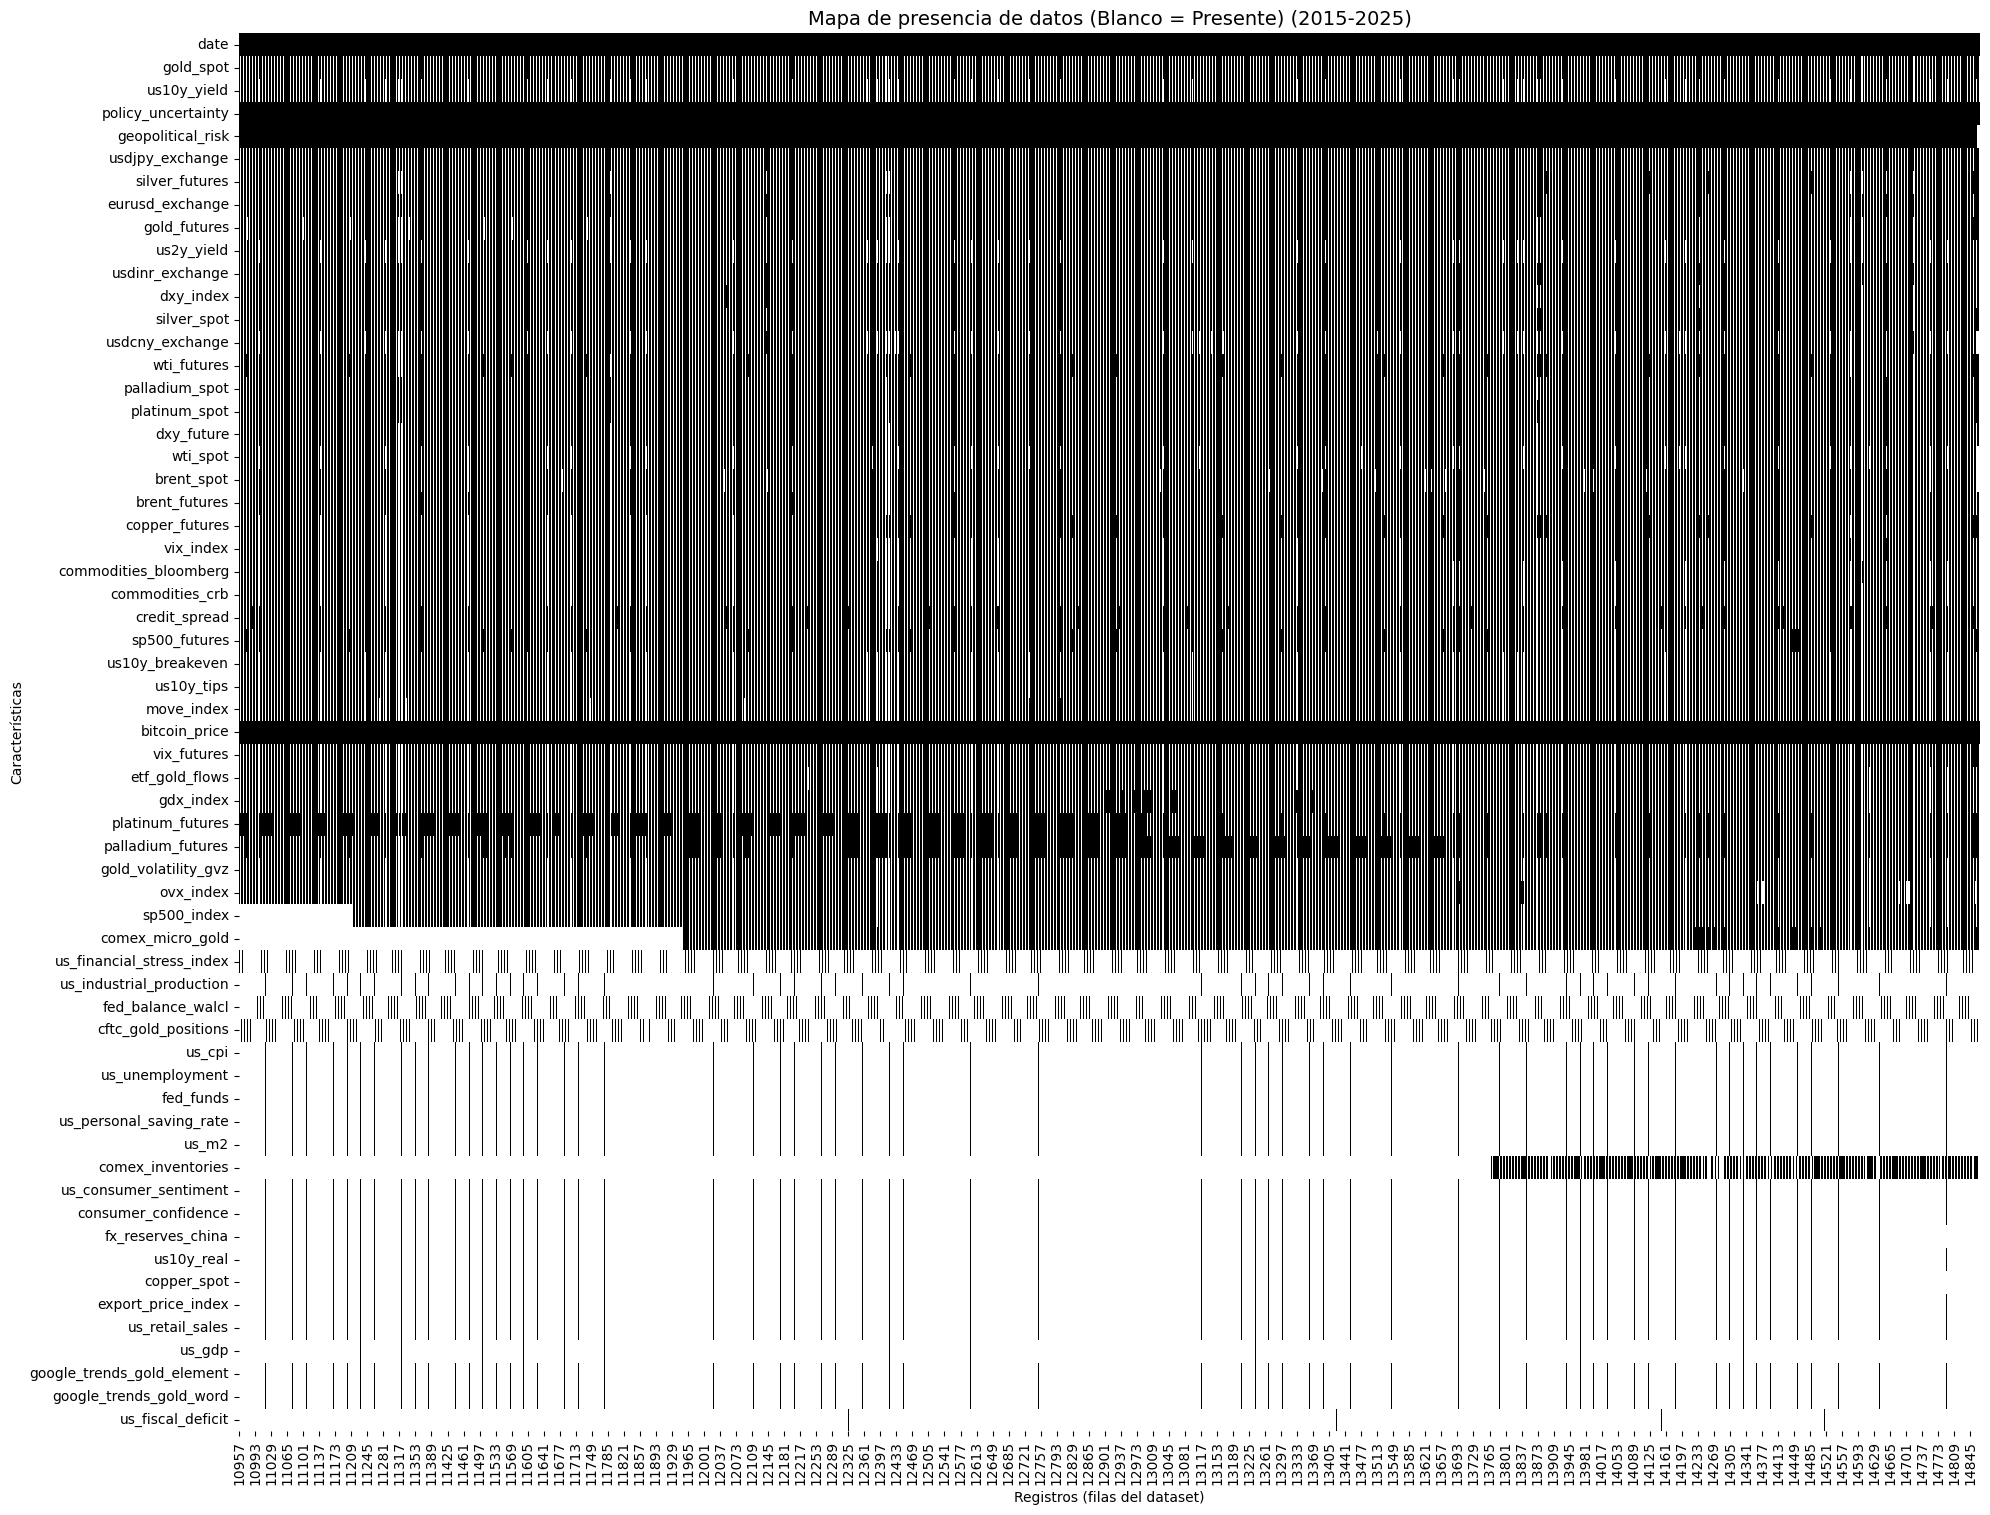

In [24]:
df_viz = df.copy()
zoom_start_year = 2015
zoom_end_year   = 2025

df_viz = df_viz[(df_viz[DATE_COL].dt.year >= zoom_start_year) &
                (df_viz[DATE_COL].dt.year <= zoom_end_year)]

null_mask = df_viz.isnull().astype(int)
plt.figure(figsize=(20, max(6, len(df_viz.columns) * 0.25)))
sns.heatmap(
    null_mask.T,
    cmap=["black", "white"],
    cbar=False
)
plt.title(f"Mapa de presencia de datos (Blanco = Presente) ({zoom_start_year}-{zoom_end_year})", fontsize=14)
plt.xlabel("Registros (filas del dataset)")
plt.ylabel("Características")
plt.tight_layout()
plt.show()

## Interpretación del zoom temporal de missingness

A continuación se analizan de forma separada los dos heatmaps generados:
(1985–1995) y (2015–2025).

---

### 1. Ventana 1985–1995: primeros 10 años del periodo elegido

En este tramo se observan varios comportamientos importantes:

#### Alta disponibilidad en las series diarias financieras
Variables como:
- `gold_futures`, `silver_futures`,
- `us10y_yield`, `us2y_yield`,
- `dxy_index`, `eurusd_exchange`,
- `wti_futures`, `vix_index`,

aparecen como **franjas completamente blancas**, indicando:
- continuidad temporal,
- frecuencia diaria sin interrupciones,
- y calidad estructural desde 1985.

Esto confirma que 1985 ya está dentro de una zona bien documentada para la mayoría de mercados
financieros.

#### Variables que comienzan justo antes o poco después de 1985
Se observa que varios indicadores —especialmente commodities y futuros secundarios— arrancan dentro
del rango 1985–1990, lo que significa que el recorte elegido **captura el inicio real** de esas series.

#### Series de baja frecuencia con patrones claros
Las variables mensuales, trimestrales y anuales exhiben la expected “separación vertical” entre puntos, lo cual es normal.

Importante:
- estas series ya tienen registros en este periodo,
- no presentan huecos de décadas como antes del recorte.

Esto refuerza que la ventana es válida también para las variables macroeconómicas.

#### Algunas series modernas aún no han comenzado
Variables como:
- Bitcoin,
- ciertos índices de volatilidad (OVX),
- algunos ETFs o futuros muy recientes,

no existen todavía en esta ventana. Esto es totalmente normal y coherente con el tiempo en que se
crearon estos activos.

---

### 2. Ventana 2015–2025: comportamiento reciente

El heatmap correspondiente a la última década muestra un patrón muy diferente:

#### Casi todas las variables están completas
La gran mayoría de filas aparecen en blanco, indicando que en esta etapa:

- los datos son mucho más densos,
- casi no hay valores faltantes,
- y todas las series modernas están completamente activas.

En otras palabras, **la parte reciente del dataset es la más rica y uniforme**.

#### Series de baja frecuencia siguen su patrón regular
En la parte inferior (CPI, M2, Retail Sales, GDP…):
- aparecen puntos aislados,
- correspondientes a sus respectivas frecuencias mensuales/trimestrales/anuales.

Este comportamiento es perfectamente esperado.

#### Las variables modernas están completamente presentes
Bitcoin, ETFs, volatilidad implícita, índices derivados…
todas estas series aparecen en blanco, indicando disponibilidad total en este tramo reciente.

---

### Conclusión del zoom temporal

El análisis de estas dos ventanas temporales confirma tres ideas clave:

1. **El recorte a 1985 es adecuado**:
   En esa fecha ya existe un núcleo sólido de variables diarias y macroeconómicas,
   sin las enormes lagunas temporales que dominaban el rango 1900–1980.

2. **Las variables modernas no distorsionan el análisis**:
   Aunque comienzan mucho más tarde, su comportamiento reciente es completo y consistente.

3. **La calidad del dataset mejora con el tiempo**:
   A partir de 2010–2015 la disponibilidad es casi total, lo que anticipa que los modelos modernos
   podrían tener mejor rendimiento en rangos más recientes.

Este análisis visual refuerza que trabajar desde 1985 es un punto de partida razonable y justificado
para el resto del EDA.


# Feature Selection —

## 8) Necesidad de un tratamiento avanzado de redundancia y multicolinealidad

Tras el análisis exploratorio, el cálculo del VIF y la inspección de las matrices de correlación,
queda claro que el dataset presenta un nivel extremadamente alto de multicolinealidad y redundancia.
Este comportamiento es habitual en datasets financieros y macroeconómicos:

- precios spot y futuros suelen estar casi perfectamente correlacionados,
- metales preciosos se mueven de forma conjunta,
- indicadores macroeconómicos comparten tendencias de largo plazo,
- índices financieros capturan información similar (riesgo, liquidez, volatilidad).

La multicolinealidad severa afecta negativamente a:

- la estabilidad de modelos lineales (coeficientes inestables),
- la interpretabilidad,
- el rendimiento de modelos basados en regularización,
- la capacidad del modelo para generalizar.

Por ello aplicaremos dos estrategias complementarias:

### **1) Agrupación por correlación (Correlation Clustering)**
- Se combinan las matrices de correlación Pearson y Spearman.
- Se genera una matriz de "similaridad robusta".
- Se agrupan features que superen un umbral alto (ej. ≥ 0.97).
- Se forman clusters de variables redundantes.
- De cada cluster se seleccionará un representante (o varios, según estrategia).

### **2) Reducción iterativa por VIF**
- Se calcula el VIF para el conjunto de variables aún supervivientes.
- Si alguna feature presenta VIF > 10, se elimina la que más contribuya.
- El proceso se repite hasta que todas las variables cumplan VIF ≤ 10.

Este pipeline híbrido permite obtener un conjunto final de características:

- no redundantes,
- informativamente diversas,
- estables estadísticamente,
- y aptas para cualquier algoritmo.

Este conjunto se usará en la etapa de feature selection o modelado.


In [25]:
import numpy as np
import pandas as pd

def correlation_clustering(df, threshold=0.97):
    """
    Agrupa features altamente correlacionadas usando Pearson+Spearman combinado.
    Devuelve lista de clusters (listas de columnas).
    """

    pearson_corr = df.corr(method="pearson").abs()
    spearman_corr = df.corr(method="spearman").abs()

    # matriz combinada robusta
    combined = (pearson_corr + spearman_corr) / 2

    visited = set()
    clusters = []

    for col in combined.columns:
        if col in visited:
            continue

        cluster = combined.columns[combined[col] >= threshold].tolist()
        clusters.append(cluster)

        for c in cluster:
            visited.add(c)

    return clusters


In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def reduce_vif(df, thresh=10.0):
    """
    Elimina iterativamente variables con VIF > umbral.
    Devuelve lista final de columnas elegidas.
    """
    cols = df.columns.tolist()

    while True:
        vif_values = [variance_inflation_factor(df[cols].values, i)
                      for i in range(len(cols))]
        max_vif = max(vif_values)
        if max_vif <= thresh:
            break

        # eliminar variable con VIF mayor
        remove_col = cols[vif_values.index(max_vif)]
        print(f"Eliminando por VIF alto: {remove_col} (VIF = {max_vif:.2f})")

        cols.remove(remove_col)

    return cols


In [27]:
# 1) Clustering por correlación
clusters = correlation_clustering(X_scaled, threshold=0.97)

selected_from_clusters = []
for group in clusters:
    # criterio simple: elegir la feature con mayor varianza o la más completa
    rep = group[0]
    selected_from_clusters.append(rep)

# DataFrame reducido
X_reduced_corr = X_scaled[selected_from_clusters]

# 2) Reducción por VIF
final_features = reduce_vif(X_reduced_corr, thresh=10)

print("Número final de features:", len(final_features))
print(final_features)


Eliminando por VIF alto: wti_spot (VIF = 1388.39)
Eliminando por VIF alto: etf_gold_flows (VIF = 1121.50)
Eliminando por VIF alto: us_cpi (VIF = 756.11)
Eliminando por VIF alto: sp500_futures (VIF = 583.30)
Eliminando por VIF alto: gold_futures (VIF = 496.94)
Eliminando por VIF alto: commodities_crb (VIF = 386.82)
Eliminando por VIF alto: fx_reserves_china (VIF = 230.60)
Eliminando por VIF alto: usdinr_exchange (VIF = 223.84)
Eliminando por VIF alto: export_price_index (VIF = 124.46)
Eliminando por VIF alto: us10y_yield (VIF = 119.08)
Eliminando por VIF alto: sp500_index (VIF = 113.11)
Eliminando por VIF alto: palladium_spot (VIF = 98.91)
Eliminando por VIF alto: dxy_index (VIF = 85.05)
Eliminando por VIF alto: silver_spot (VIF = 66.23)
Eliminando por VIF alto: us_industrial_production (VIF = 55.65)
Eliminando por VIF alto: google_trends_gold_element (VIF = 50.27)
Eliminando por VIF alto: fed_balance_walcl (VIF = 41.24)
Eliminando por VIF alto: platinum_spot (VIF = 36.84)
Eliminando po

### 9) Interpretación del proceso de reducción por VIF (Variance Inflation Factor)

El análisis del VIF confirmó de manera clara que el dataset original presentaba
una multicolinealidad extremadamente elevada. Algunas variables alcanzaron valores
de VIF superiores a 1000, lo cual significa que pueden explicarse casi
completamente a partir de combinaciones lineales de otras variables. Este fenómeno
es muy frecuente en datasets financieros y macroeconómicos, donde muchos
indicadores se mueven conjuntamente (por ejemplo, oro spot y futuros, spreads de
bonos, índices de commodities o tipos de cambio fuertemente correlacionados).

El algoritmo aplicado procede de forma iterativa:
1. Calcula el VIF de todas las variables activas.
2. Identifica la variable con el VIF más alto.
3. Si supera el umbral convencional de 10, la elimina.
4. Repite el proceso recalculando VIF tras cada eliminación.

La salida del proceso muestra cómo las primeras variables eliminadas tenían VIF
extremadamente altos (entre 300 y 1500), indicando redundancia casi total. Tras
aproximadamente 35 iteraciones, el conjunto final quedó reducido a **24 variables**
que cumplen el criterio VIF ≤ 10. Esto implica un conjunto de características:

- menos redundantes,
- matemáticamente estables,
- y adecuadas para métodos lineales y no lineales.

Es importante destacar que la reducción por VIF **no selecciona “las mejores” variables**, sino que elimina únicamente aquellas responsables de redundancia lineal. Por este motivo, el VIF se combinará con otros métodos (correlación, importancia de modelos y análisis económico) para la selección definitiva de características.


El cálculo del Variance Inflation Factor (VIF) permitió diagnosticar la presencia
de multicolinealidad severa en el conjunto inicial de características. Algunos
indicadores presentaron valores extremadamente elevados (en ocasiones superiores a
1000), lo cual evidencia una redundancia lineal profunda entre variables
financieras y macroeconómicas altamente correlacionadas entre sí.

Se aplicó un procedimiento iterativo que elimina, en cada paso, la variable con
el VIF más alto siempre que supere el umbral de 10. El algoritmo recalcula el VIF
tras cada eliminación y continúa hasta obtener un conjunto estadísticamente
estable. Como resultado, el número de características se redujo de aproximadamente
59 a **24 variables**, preservando aquellas que no presentan redundancia lineal
severa.

Este proceso no constituye una selección final de características, sino un paso
intermedio para garantizar estabilidad numérica en las siguientes fases del
proyecto. La selección definitiva se realizará combinando criterios de correlación,
información mutua, importancia de modelos y relevancia económica.
